In [ ]:

import kagglehub
kagglehub.login()


In [ ]:


komalacer_songsds_path = kagglehub.dataset_download('komalacer/songsds')


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# 📊EDA и ресерч-анализ.


##  Чтение датасета

Для начала, читаем график и смотрим на его поля

In [57]:
df = pd.read_csv('dataset.csv')
df

Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1              0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2              0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3              0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4              0.618  0.4430  ...    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350  ...   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170  ...   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290  ...   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060  ...   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870  ...   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.97

Сразу видим, что в графике есть 2 поля, которые никак не влияют на популярность, поле:
> 'Unnamed: 0', которое дублирует индексы

> 'track_id' которое обозначает уникальный идентификатор.

Их мы сразу отбрасываем.

In [58]:
df = df.drop(['Unnamed: 0', 'track_id'], axis=1)
start_df = df
df

artists  \
0                  Gen Hoshino   
1                 Ben Woodward   
2       Ingrid Michaelson;ZAYN   
3                 Kina Grannis   
4             Chord Overstreet   
...                        ...   
113995           Rainy Lullaby   
113996           Rainy Lullaby   
113997           Cesária Evora   
113998        Michael W. Smith   
113999           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1              0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2              0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3              0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4              0.618  0.4430    2    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350    5   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170    0   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290    0   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060    7   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870    1   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4   
113998          0.000000    0.2700   0.4130  135.960               4   
113999          0.000000    0.0893   0.7080   79.198               4   

        track_genre  
0          acoustic  
1          acoustic  
2          acoustic  
3          acoustic  
4          acoustic  
...             ...  
113995  world-music  
11

Разберемся с оставшимися колонками получше.
1. > artists: исполнители трека.
2. > album_name: название альбома.
3. > track_name: название трека.
4. > popularity: рейтинг популярности, видимо от 0 до 100.  (Цель нашего предсказания)
5. > duration_ms: длительность трека в миллисекундах.
6. > explicit: индикатор наличия нецензурной лексики (True/False).
7. > danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence,  tempo: аудиофичи трека.
8. > key, mode, time_signature: музыкальные характеристики.
9. > track_genre: жанр трека.

Сначала проверим пропущенные значения в нашем датафрейме

In [59]:
df.isnull().sum()

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Видим что в колонках '*track_name*' '*artists*' '*album_name*' присутсвуют пропущенные значения. Мы можем заполнить их средним или модой по всем значениям, но так как их количество очень мало на общем фоне данных, то я их просто отброшу.
 '

In [60]:
df = df.dropna()
df.isnull().sum()

artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

## Графики

Посмотрим на распределение популярности по трекам.

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=30, kde=True, color='skyblue')
plt.title('График популярности треков', fontsize=16)
plt.xlabel('Популярность', fontsize=14)
plt.ylabel('Кол-во', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* Из графика видно, что идет **перевес популярности в левую часть**, к меньшим значениям.
Это означает что **наибольшое количество треков не сыскали популярности** и имеют низкие ее значения. Так наибольшее количество треков имеют популярность от **0 до 20**. Менее всего треков с популярностью от **80-100**.

    Попробуем посмотреть как каждая из характеристик влияет на популярность трека. Начнем с исполнителей треков. Так как в треках может учавствовать несколько артистов и чаще всего они разделены ';', попробуем разделить их и посмотреть среднюю популярность их треков.




<ipython-input-62-ca3a8ad35456>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_popularity.values, y=artist_popularity.index, palette='viridis')


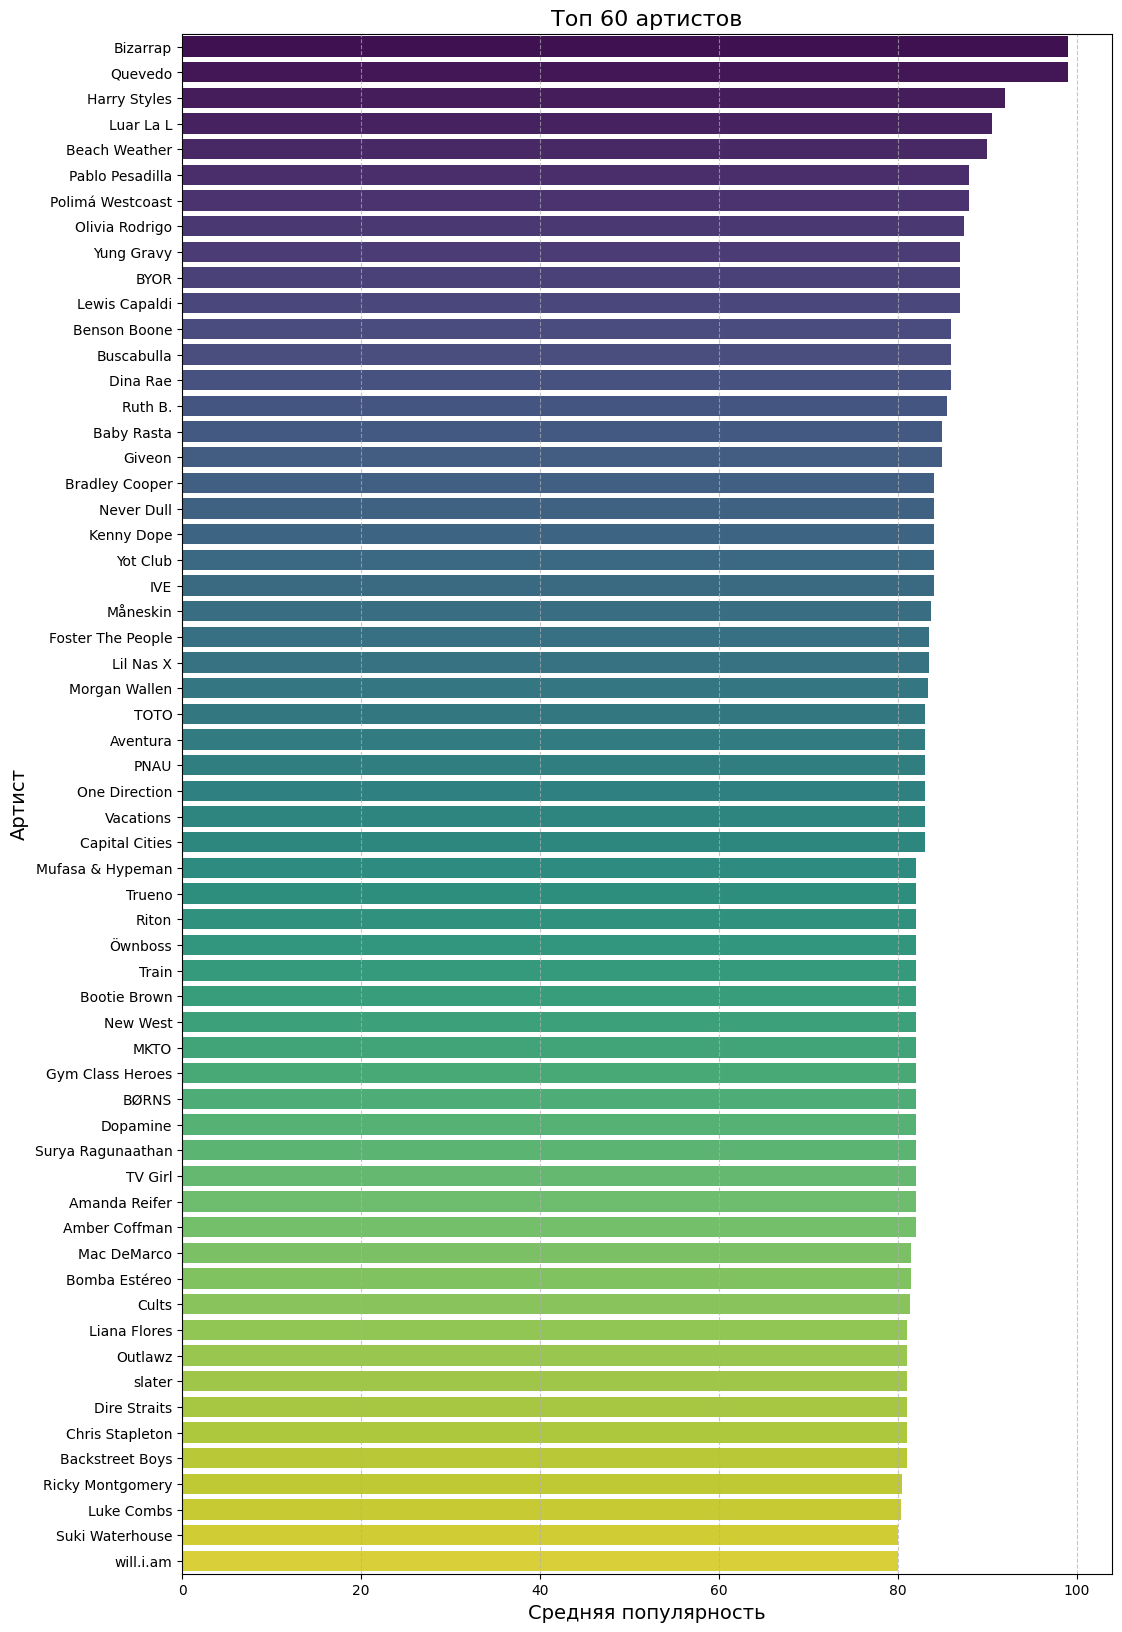

In [62]:
data_exploded = df.copy()
data_exploded['artists'] = data_exploded['artists'].str.split(';')
data_exploded = data_exploded.explode('artists')
data_exploded['artists'] = data_exploded['artists'].str.strip()

artist_popularity = (
    data_exploded.groupby('artists')['popularity']
    .mean()
    .sort_values(ascending=False)
    .head(60)
)

plt.figure(figsize=(12, 20))
sns.barplot(x=artist_popularity.values, y=artist_popularity.index, palette='viridis')
plt.title('Топ 60 артистов', fontsize=16)
plt.xlabel('Средняя популярность', fontsize=14)
plt.ylabel('Артист', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Можем увидить, что исполнители попавшие в топ, имеют среднюю популярность своих треков 80+. Тоесть если это имя фигурирует в исполнителях трека, наиболее вероятно, что этот трек достаточно популярен.

Посмотрим зависимость количества исполнителей на популярность.

In [63]:
df['artists'] = df['artists'].fillna('')
df['num_artists'] = df['artists'].str.split(';').apply(lambda x: len(x) if isinstance(x, list) else 0)

popularity_by_num_artists = (
    df.groupby('num_artists')['popularity']
    .mean()
    .reset_index()
    .sort_values(by='num_artists')
)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='num_artists',
    y='popularity',
    data=popularity_by_num_artists,
    palette='viridis'
)
plt.title('Популярность по числу артистов', fontsize=16)
plt.xlabel('Число артистов', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-63-e87ce4b0136c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['artists'] = df['artists'].fillna('')
<ipython-input-63-e87ce4b0136c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_artists'] = df['artists'].str.split(';').apply(lambda x: len(x) if isinstance(x, list) else 0)
<ipython-input-63-e87ce4b0136c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the s

Первоначально я сделал вывод, что треки с большим количеством исполнителей чаще всего популярны и достаточно ощутимо, но затем я решил посмортеть на распределения количества треков.

In [64]:
song_counts = df.groupby('num_artists')['track_name'].count().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(
    x='num_artists',
    y='track_name',
    data=song_counts,
    palette='viridis'
)
plt.title('Количество песен по кол-во артистов', fontsize=16)
plt.xlabel('Кол-во артистов', fontsize=14)
plt.ylabel('Количество песен', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-64-f94f58879661>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Оказалось, что количество треков с исполнителями >= 9 ничтожно мало в отношении с количеством от 1-8. А это значит что на прошлый график могли повлиять еденичные песни, на основе которых нельзя делать каких либо выводов и строить закономерности. Для того чтобы получить какую-либо полезную информацию я решил, отобразить среднюю популярность треков по количеству исполнителей, при этом учитывая только те значения, где для данного числа исполнителей есть хотя бы 100 песен.

In [65]:
popularity_by_artists = df.groupby('num_artists')['popularity'].mean().reset_index()
song_counts = df.groupby('num_artists')['track_name'].count().reset_index()
filtered_popularity = popularity_by_artists[song_counts['track_name'] >= 100]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    x='num_artists',
    y='popularity',
    data=filtered_popularity,
    palette='viridis'
)
plt.title('Средняя популярность ко кол-ву артистов', fontsize=16)
plt.xlabel('Кол-во артистов', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-65-31af1c73406d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


На основе этого графика можно сделать более уверенные выводы, так как выборка включает не менее 100 песен. Из наблюдений видно, что самые популярные треки принадлежат к группе с тремя исполнителями, за ними следуют песни с двумя исполнителями, затем с одним и четырьмя исполнителями. После этих групп популярность песен постепенно снижается, начиная с количества исполнителей в 5, 6 и 7, в порядке убывания.

Затем я решил проверить то же самое с альбомами

In [66]:
popularity_by_album = df.groupby('album_name')['popularity'].mean().reset_index()
popularity_by_album = popularity_by_album.sort_values(by='popularity', ascending=False)

plt.figure(figsize=(12, 20))
sns.barplot(
    x='popularity',
    y='album_name',
    data=popularity_by_album.head(60),
    palette='viridis'
)
plt.title('Средняя популярность альбомов топ-60', fontsize=16)
plt.xlabel('Средняя популярность', fontsize=14)
plt.ylabel('Имя альбома', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-66-b20dad634066>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Сдесь получилось тоже самое. Это список топ альбомов и если трек входит в этот альбом, наиболее вероятно что его популярность >= 80. Помимо этого в топе я увидел множество фитов и решил проверить их популярность.

<ipython-input-67-adbcbdaa8466>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fit_albums = df[df['album_name'].str.contains(
<ipython-input-67-adbcbdaa8466>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


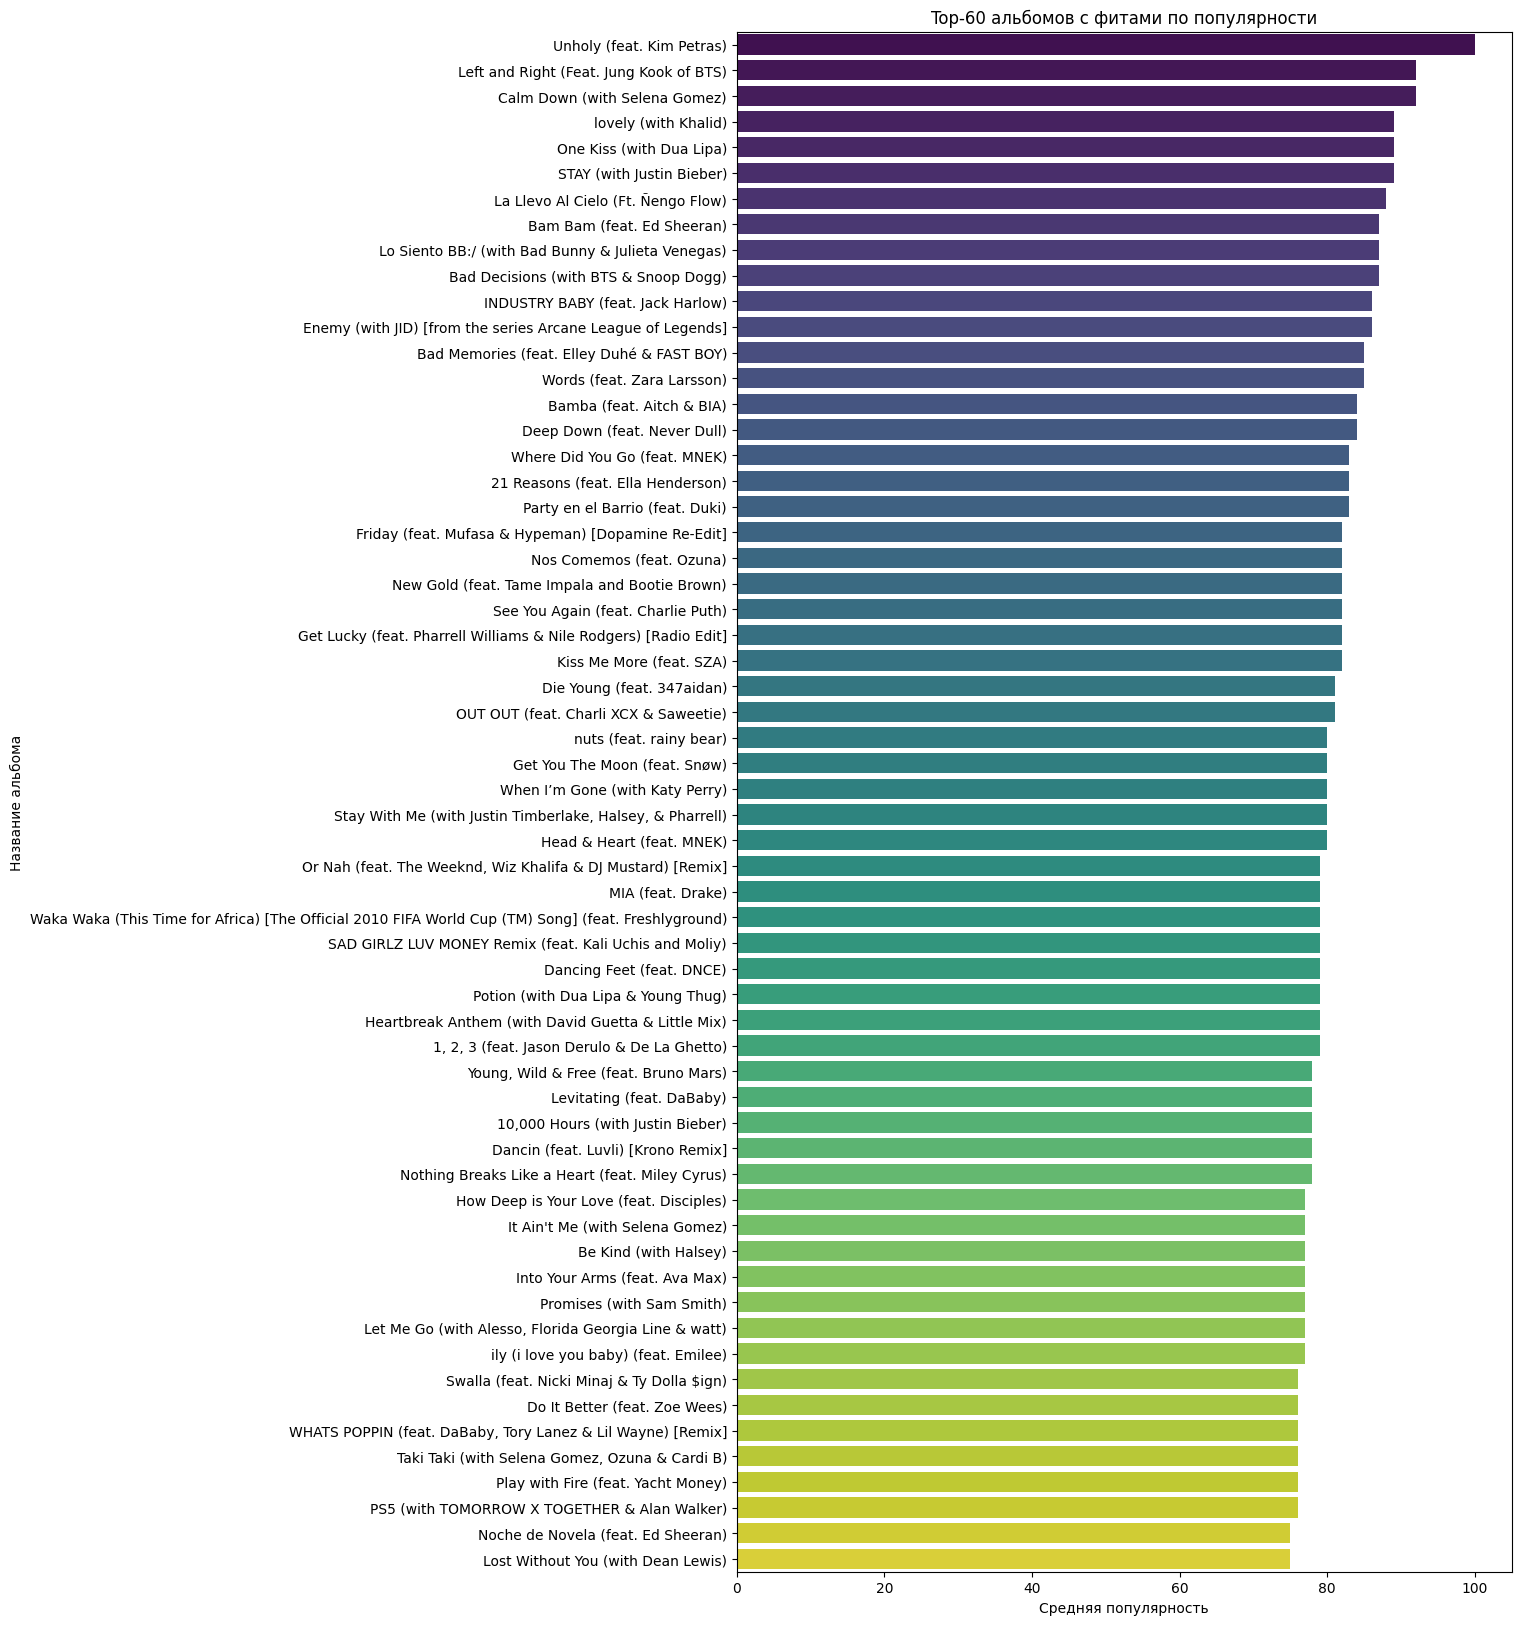

In [67]:
keywords = ['ft.', 'feat.', 'with', 'Ft']
fit_albums = df[df['album_name'].str.contains(
    r'\(.*?(' + '|'.join(keywords) + r').*?\)',
    case=False, na=False
)]

album_popularity = (
    fit_albums.groupby('album_name')['popularity']
    .mean()
    .reset_index()
    .sort_values(by='popularity', ascending=False)
)

plt.figure(figsize=(10, 20))
sns.barplot(
    data=album_popularity.head(60),
    x='popularity',
    y='album_name',
    palette='viridis'
)
plt.title('Top-60 альбомов с фитами по популярности')
plt.xlabel('Средняя популярность')
plt.ylabel('Название альбома')
plt.show()

Данный график, мне мало что показывает, никаких точных выводов по нему я сделать не смог. Поэтому решил использовать немного другой подход. Сравнить популярности трека с фитом и без фита.

<ipython-input-68-55a445175fd0>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['is_fit_album'] = df['album_name'].str.contains(
<ipython-input-68-55a445175fd0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_fit_album'] = df['album_name'].str.contains(
<ipython-input-68-55a445175fd0>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popularity_comparison, x='is_fit_album', y='popularity', palette='coolwarm')


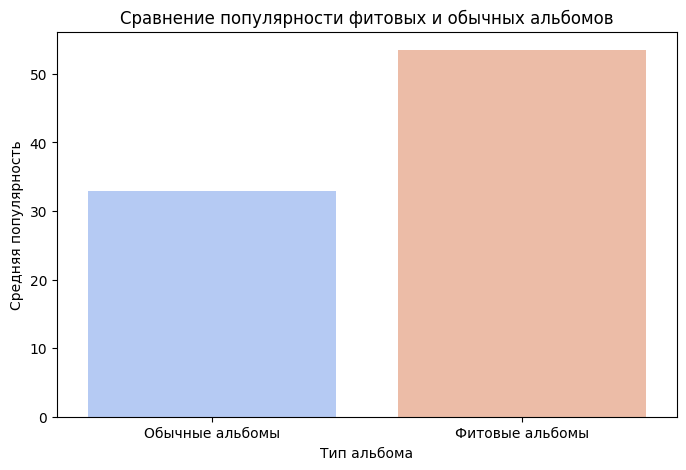

In [68]:

keywords = ['ft.', 'feat.', 'with', 'Ft']

df['is_fit_album'] = df['album_name'].str.contains(
    r'\(.*?(' + '|'.join(keywords) + r').*?\)',
    case=False, na=False
)

popularity_comparison = df.groupby('is_fit_album')['popularity'].mean().reset_index()

popularity_comparison['is_fit_album'] = popularity_comparison['is_fit_album'].replace(
    {True: 'Фитовые альбомы', False: 'Обычные альбомы'}
)

plt.figure(figsize=(8, 5))
sns.barplot(data=popularity_comparison, x='is_fit_album', y='popularity', palette='coolwarm')
plt.title('Сравнение популярности фитовых и обычных альбомов')
plt.xlabel('Тип альбома')
plt.ylabel('Средняя популярность')
plt.show()

Вот здесь уже отличный результат, мы видим что альбомы с фитом, намного популярнее в среднем обычных альбомов, скорее всего это связано с тем что фитуют именно популярные личности и все ждут их совместного альбома. Так же это может объяснить почему, треки в которых >1 и <3 исполнителей популярнее остальных. Вывод, что треки входящие в фитовый альбом будут популярнее, тех что не входят. Проверим популярность по названиям треков.

In [69]:
track_popularity = (
    df.groupby('track_name')['popularity']
    .mean()
    .reset_index()
    .sort_values(by='popularity', ascending=False)
)

top_60_tracks = track_popularity.head(60)

plt.figure(figsize=(12, 20))
sns.barplot(
    data=top_60_tracks,
    x='popularity',
    y='track_name',
    palette='viridis'
)
plt.title('Top-60 треков по популярности')
plt.xlabel('Средняя популярность')
plt.ylabel('Название трека')
plt.show()


<ipython-input-69-cff79bfd22c5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Здесь каких либо зависимостей популярности кроме фитов я не заметил, поэтому решил проверить так же как и с альбомами, сравнив популярность треков с фитом и без него.

<ipython-input-70-983cbce0a225>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['is_fit_track'] = df['track_name'].str.contains(
<ipython-input-70-983cbce0a225>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_fit_track'] = df['track_name'].str.contains(
<ipython-input-70-983cbce0a225>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popularity_comparison_tracks, x='is_fit_track', y='popularity', palette='coolwarm')


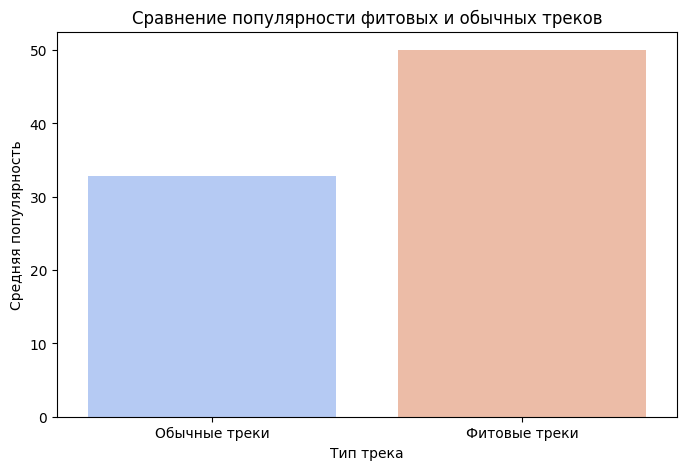

In [70]:
keywords = ['ft.', 'feat.', 'with', 'Ft']

df['is_fit_track'] = df['track_name'].str.contains(
    r'\(.*?(' + '|'.join(keywords) + r').*?\)',
    case=False,
    na=False
)

popularity_comparison_tracks = df.groupby('is_fit_track')['popularity'].mean().reset_index()

popularity_comparison_tracks['is_fit_track'] = popularity_comparison_tracks['is_fit_track'].replace(
    {True: 'Фитовые треки', False: 'Обычные треки'}
)

plt.figure(figsize=(8, 5))
sns.barplot(data=popularity_comparison_tracks, x='is_fit_track', y='popularity', palette='coolwarm')
plt.title('Сравнение популярности фитовых и обычных треков')
plt.xlabel('Тип трека')
plt.ylabel('Средняя популярность')
plt.show()


Тут тоже мы видим отличные результаты, такие же как и с альбомами. Разрыв между ними меньше чем у альбомов, но разница все равно существенная. Выводы сохраняются такими же как и с альбомами. Скорее всего это связано с тем что фитуют именно популярные личности и все ждут их совместного трека.

Теперь посмотрим на зависимость времени трека и популярности. Сразу переведу в минуты для наглядности графика.


<ipython-input-71-5e50aeb09f99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_min'] = df['duration_ms'] / 60000


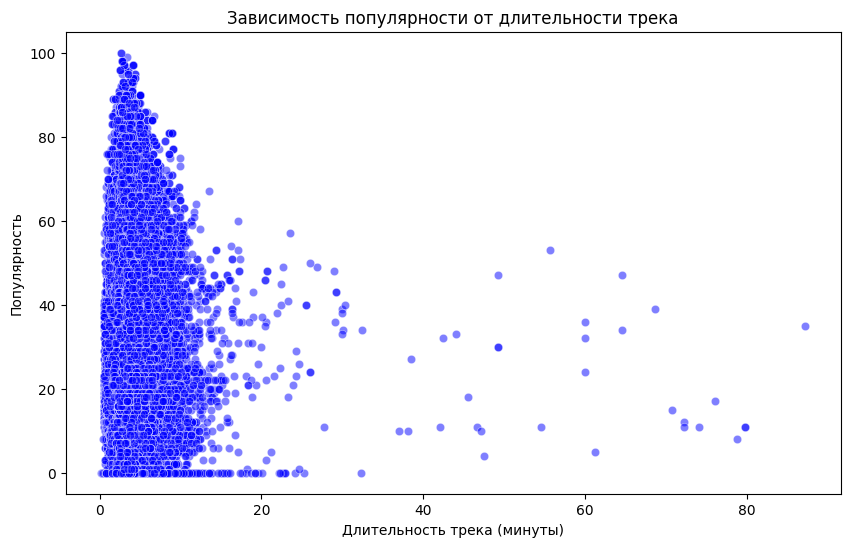

In [71]:
df['duration_min'] = df['duration_ms'] / 60000

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration_min', y='popularity', alpha=0.5, color='blue')
plt.title('Зависимость популярности от длительности трека')
plt.xlabel('Длительность трека (минуты)')
plt.ylabel('Популярность')
plt.show()

Здесь никаких особых выводов сделать не могу, кроме того что в основном треки выпускаются длиной от 0 до 20 минут и самые популярные треки находятся именно в этом диапазоне, как и большинство треков с 0-евой популярностью.

<ipython-input-72-63c2773663eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_min'] = df['duration_ms'] / 60000


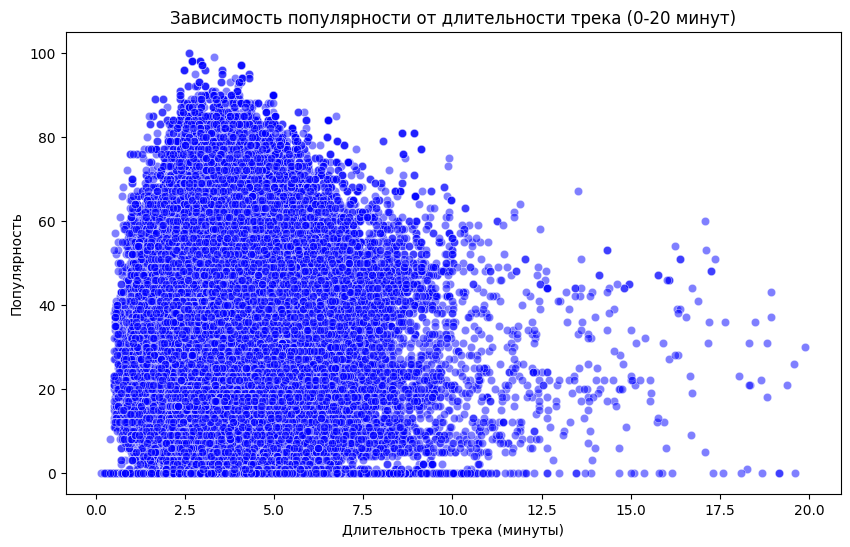

In [72]:
df['duration_min'] = df['duration_ms'] / 60000

filtered_df = df[(df['duration_min'] >= 0) & (df['duration_min'] <= 20)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='duration_min', y='popularity', alpha=0.5, color='blue')
plt.title('Зависимость популярности от длительности трека (0-20 минут)')
plt.xlabel('Длительность трека (минуты)')
plt.ylabel('Популярность')
plt.show()

Рассмотрев график поближе можно еще немного ссузить диапазон, так как основное большиство все еще находится в левой части графика, а именно в диапазоне от 0-10 минут.

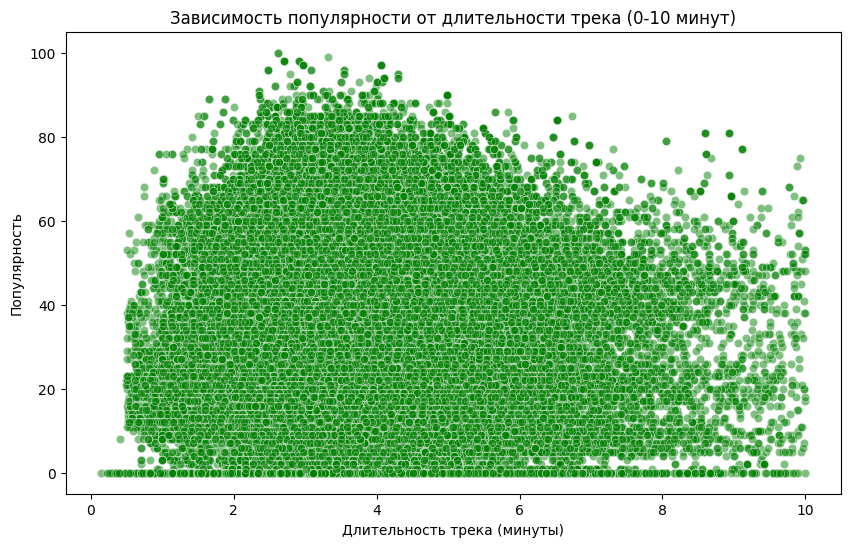

In [73]:
filtered_df_10 = df[(df['duration_min'] >= 0) & (df['duration_min'] <= 10)]

# Строим график зависимости
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df_10, x='duration_min', y='popularity', alpha=0.5, color='green')
plt.title('Зависимость популярности от длительности трека (0-10 минут)')
plt.xlabel('Длительность трека (минуты)')
plt.ylabel('Популярность')
plt.show()

Здесь уже такого сильного разброса данных нет, и по этоим интервалам можно построить график средней популярности, с какой либо закономерностью.

In [74]:
bins = [0, 2, 4, 6, 8, 10]
labels = ['0-2 мин', '2-4 мин', '4-6 мин', '6-8 мин', '8-10 мин']
df['duration_category'] = pd.cut(df['duration_min'], bins=bins, labels=labels, right=False)

average_popularity_by_duration = (
    df.groupby('duration_category')['popularity']
    .mean()
    .reset_index()
    .sort_values(by='duration_category')
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=average_popularity_by_duration,
    x='duration_category',
    y='popularity',
    palette='coolwarm'
)
plt.title('Средняя популярность треков в зависимости от длительности')
plt.xlabel('Длительность трека (минуты)')
plt.ylabel('Средняя популярность')
plt.show()

<ipython-input-74-ed3e2397bf4a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_category'] = pd.cut(df['duration_min'], bins=bins, labels=labels, right=False)
<ipython-input-74-ed3e2397bf4a>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('duration_category')['popularity']
<ipython-input-74-ed3e2397bf4a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Теперь всё стало предельно наглядно, и можно с уверенностью утверждать, что самые популярные треки имеют длительность от 4 до 6 минут. На втором месте — треки длиной от 2 до 4 минут. Далее, примерно равную популярность показывают треки с продолжительностью от 6 до 8 минут и от 8 до 10 минут. Наименее популярны треки длительностью от 0 до 2 минут.

Далее проверим влияние на популярность нецензурной лексики.

In [75]:
explicit_popularity = (
    df.groupby('explicit')['popularity']
    .mean()
    .reset_index()
    .sort_values(by='popularity', ascending=False)
)

explicit_popularity['explicit'] = explicit_popularity['explicit'].replace(
    {True: 'С нецензурной лексикой', False: 'Без нецензурной лексики'}
)

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=explicit_popularity, x='explicit', y='popularity', palette='coolwarm')

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        fontsize=12, color='black',
        xytext=(0, 5), textcoords='offset points'
    )

plt.title('Влияние нецензурной лексики на популярность треков')
plt.xlabel('Тип трека')
plt.ylabel('Средняя популярность')
plt.show()


<ipython-input-75-55e9c265d989>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=explicit_popularity, x='explicit', y='popularity', palette='coolwarm')


Как мы видим, треки с нецензурной лексикой в среднем набирают популярности больше, чем без, хоть это значение и незначительно. Перейдем к музыкальным фичам.

In [76]:
audio_features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo'
]

plt.figure(figsize=(15, 20))

for i, feature in enumerate(audio_features, 1):
    plt.subplot(5, 2, i)
    sns.regplot(data=df, x=feature, y='popularity', scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
    plt.title(f'Влияние {feature} на популярность')
    plt.xlabel(feature)
    plt.ylabel('Популярность')

plt.tight_layout()
plt.show()

Пробежимся по каждому графику по отдельности. Тяжело сделать какие то точные выводы, но я могу сказать, что:

> чем больше danceability тем выше популярность

> energy практически не влияет на популярность

> чем больше loudness тем выше популярность

> чем меньше speechiness тем выше популярность

> чем меньше acousticness тем выше популярность

> чем ниже instumentalness тем выше популярность

> liveness практически не влияет на популярность

> чем ниже valence тем выше популярность

> чем выше tempo тем выше популярность

каких то других выводов опираясь на данные графики сделать я не смог. Ну и так как значений было очень много я попытался разбить их на 10 групп. С одной стороны это сделаих немного наглядней и поможет нейросети при обработке, с другой стороны это ухудшит их точность. Но так как я не имею нужных мощностей чтоб обработать такое большое количество значений. Оставим их разбитыми на 10 групп.



<ipython-input-77-ea221077c6d7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{feature}_category'] = pd.qcut(df[feature], q=10, labels=False, duplicates='drop')
<ipython-input-77-ea221077c6d7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{feature}_category'] = pd.qcut(df[feature], q=10, labels=False, duplicates='drop')
<ipython-input-77-ea221077c6d7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

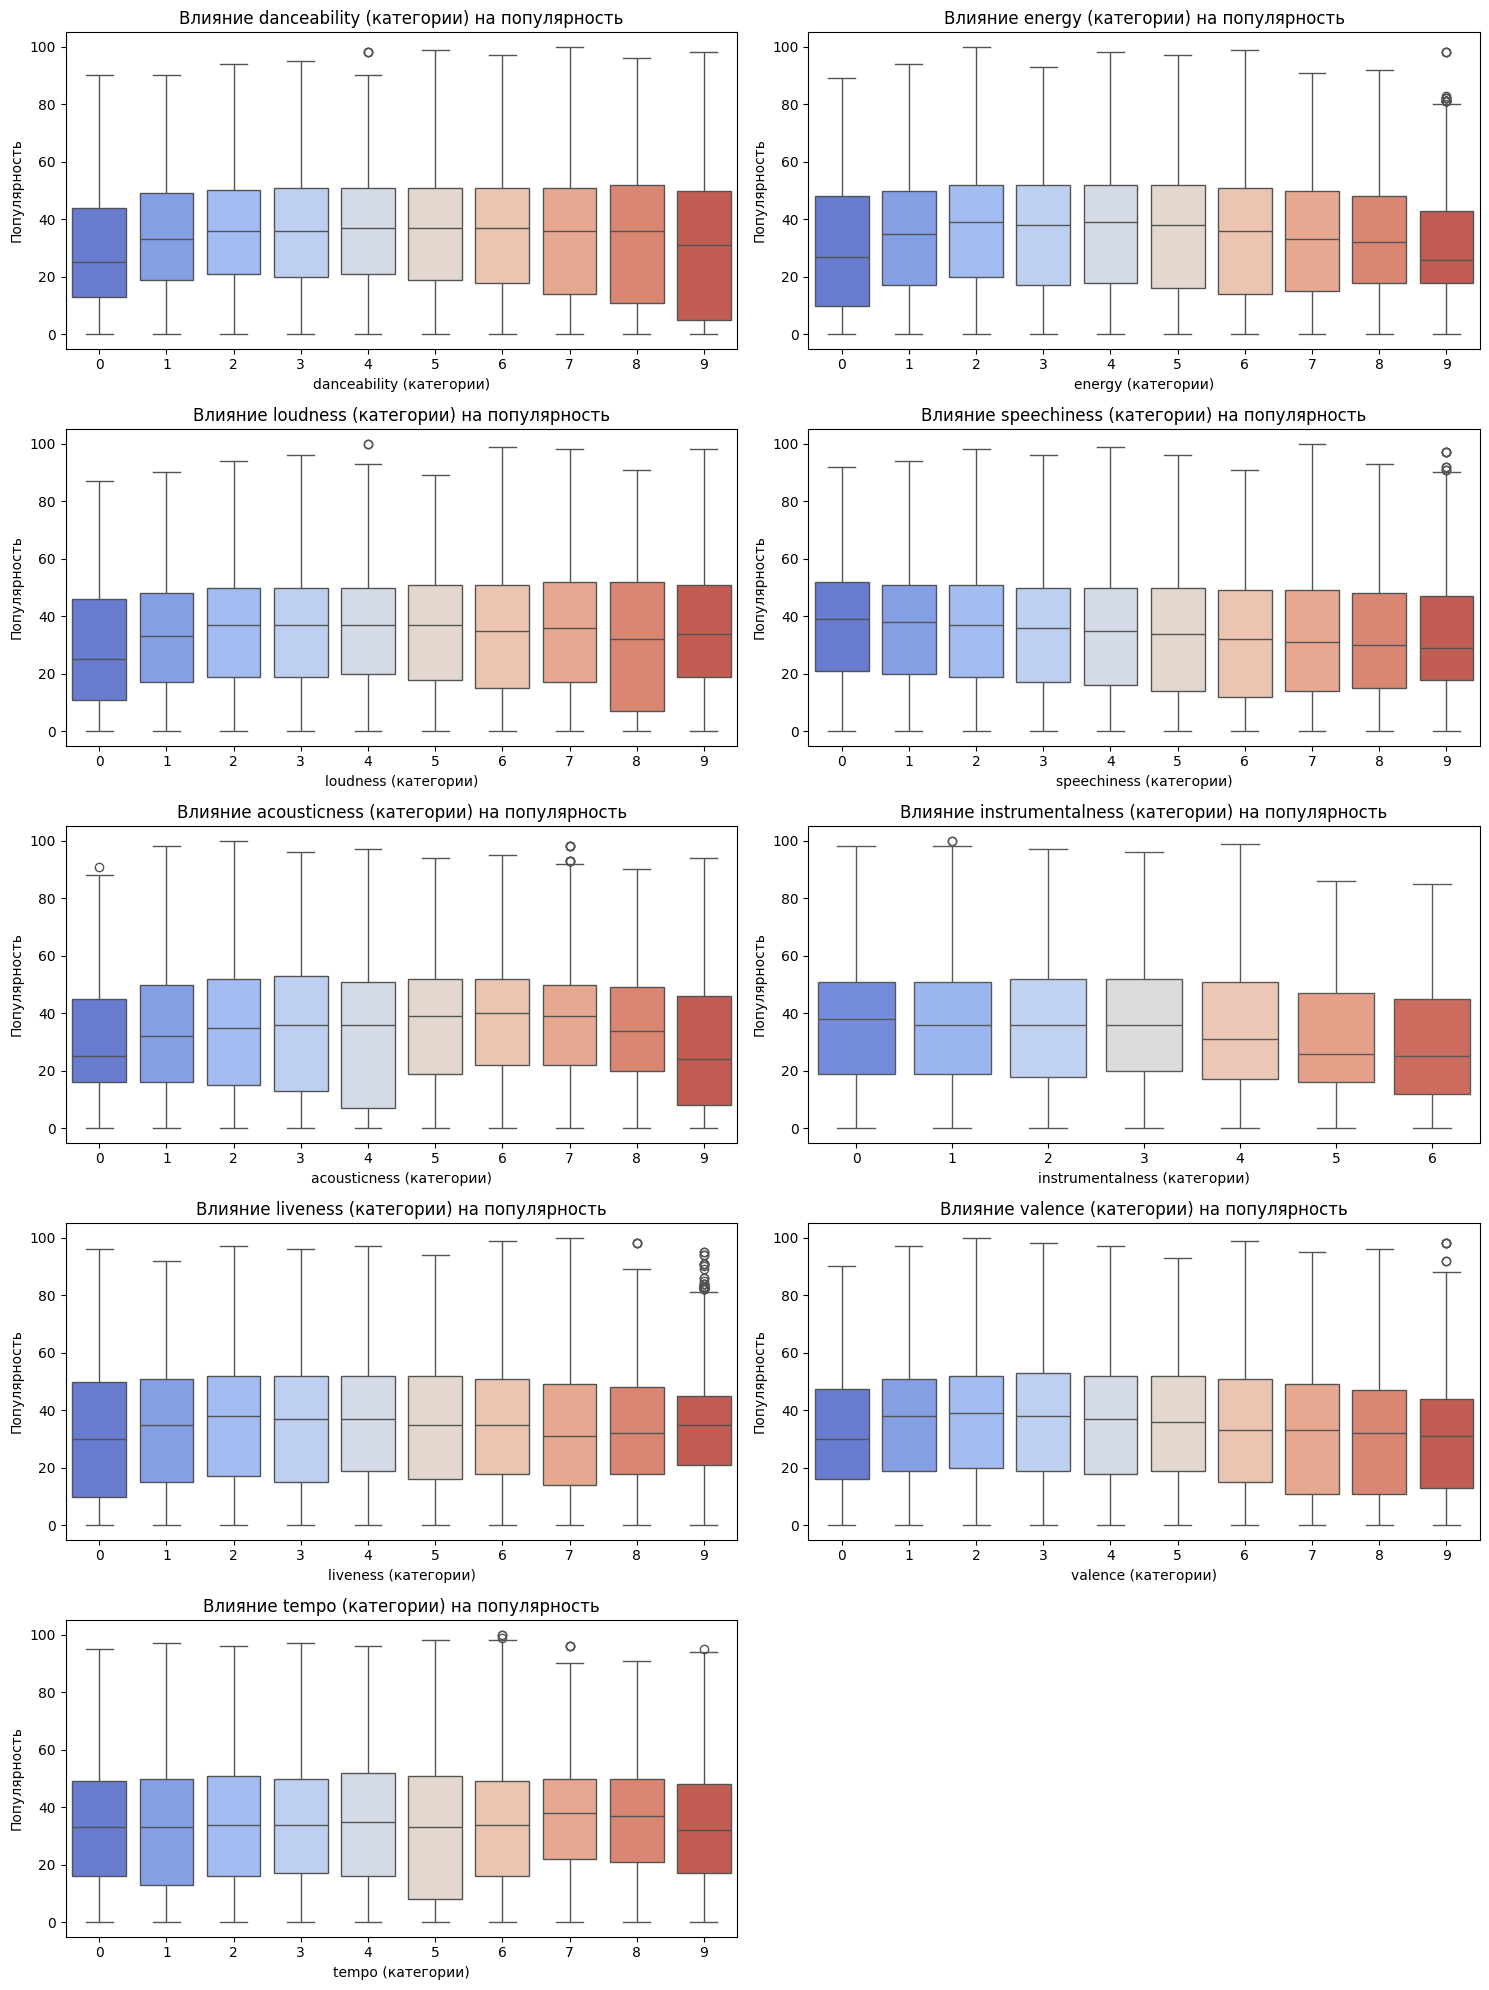

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'num_artists',
       'is_fit_album', 'is_fit_track', 'duration_min', 'duration_category',
       'danceability_category', 'energy_category', 'loudness_category',
       'speechiness_category', 'acousticness_category',
       'instrumentalness_category', 'liveness_category', 'valence_category',
       'tempo_category'],
      dtype='object')

In [77]:
audio_features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo'
]

# Разделение значений каждой аудиофичи на 10 групп
for feature in audio_features:
    df[f'{feature}_category'] = pd.qcut(df[feature], q=10, labels=False, duplicates='drop')

plt.figure(figsize=(15, 20))

# Визуализация
for i, feature in enumerate(audio_features, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(data=df, x=f'{feature}_category', y='popularity', palette='coolwarm')
    plt.title(f'Влияние {feature} (категории) на популярность')
    plt.xlabel(f'{feature} (категории)')
    plt.ylabel('Популярность')

plt.tight_layout()
plt.show()
df.columns

Хоть графики и стали немного нагляднее, на них появились перепады значений, и выводы делать по ним стало еще тяжелее. Поэтому я сохраню те что были сделаны ранее и буду опираться на них, так как они были мне более понятны. Так же здесь было добавлено множество новых значений, а именно категорий этих значений - 'danceability_category', 'energy_category',  'loudness_category', 'speechiness_category', 'acousticness_category'  'instrumentalness_category', 'liveness_category', 'valence_category   'tempo_catego

    r> y'
Перейдем к музыкальным характеристикам.

In [78]:
music_features = ['key', 'mode', 'time_signature']

plt.figure(figsize=(18, 12))

for i, feature in enumerate(music_features, 1):
    plt.subplot(3, 1, i)

    ax = sns.barplot(data=df, x=feature, y='popularity', palette='coolwarm', ci=None)

    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():.2f}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center',
            fontsize=12, color='black',
            xytext=(0, 5), textcoords='offset points'
        )

    plt.title(f'Влияние {feature} на популярность', fontsize=14)
    plt.xlabel(feature)
    plt.ylabel('Популярность')

plt.tight_layout()
plt.suptitle('Музыкальные характеристики и их влияние на популярность', fontsize=16, y=1.02)
plt.show()


<ipython-input-78-4a8ae0abc34a>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x=feature, y='popularity', palette='coolwarm', ci=None)
<ipython-input-78-4a8ae0abc34a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x=feature, y='popularity', palette='coolwarm', ci=None)
<ipython-input-78-4a8ae0abc34a>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x=feature, y='popularity', palette='coolwarm', ci=None)
<ipython-input-78-4a8ae0abc34a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x=feature, y='popularity', p

> Здесь графики получаются достаточно наглядными и понятными и по ним легко сделать выводы. Так самые популярные тональности - 2 и 4, затем идет 11, 6 и тд.... Здесь не удивительно что лидирующими являются 2 и 4, потому что они являются главными тональностями в музыке.

> Модальность - здесь лидирует минор на 0.65 едениц популярности, на самом деле этот результат меня удивил, так как я думал что людям больше нравится веселая музыка, но результат показал обратное. Правда это может быть связано еще с тем что большое количество неизвестной музыки пишется именно в мажоре, что и портит итоговую статистику, здесь точно сказать невозможно.

> Так как я не особо понимаю в музыке я не знаю что означает последний параметр, и покапавшись в интернете тоже не смог найти каких либо причин, того что некоторые величины популярнее. Поэтому просто возьмем за факт что 0 - наиболее популярен, затем идет 4, 3, 1, 5

Так как тут нет огромного разброса значений столбцов, я принял решение никак их не изменять и оставить в таком формате, так как они оказывают достаточное влияние на популярность.

Посмотри теперь на жанры.

In [79]:
df.track_genre.value_counts()

track_genre
world-music          1000
acoustic             1000
show-tunes           1000
singer-songwriter    1000
ska                  1000
                     ... 
black-metal          1000
bluegrass            1000
blues                1000
brazil               1000
k-pop                 999
Name: count, Length: 114, dtype: int64

Всего мы имеем - 114 жанров по 1000 треков в каждом, теперь посмотрим на их популярность


<ipython-input-80-3c2091b688c6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_popularity, x='popularity', y='track_genre', palette='viridis')


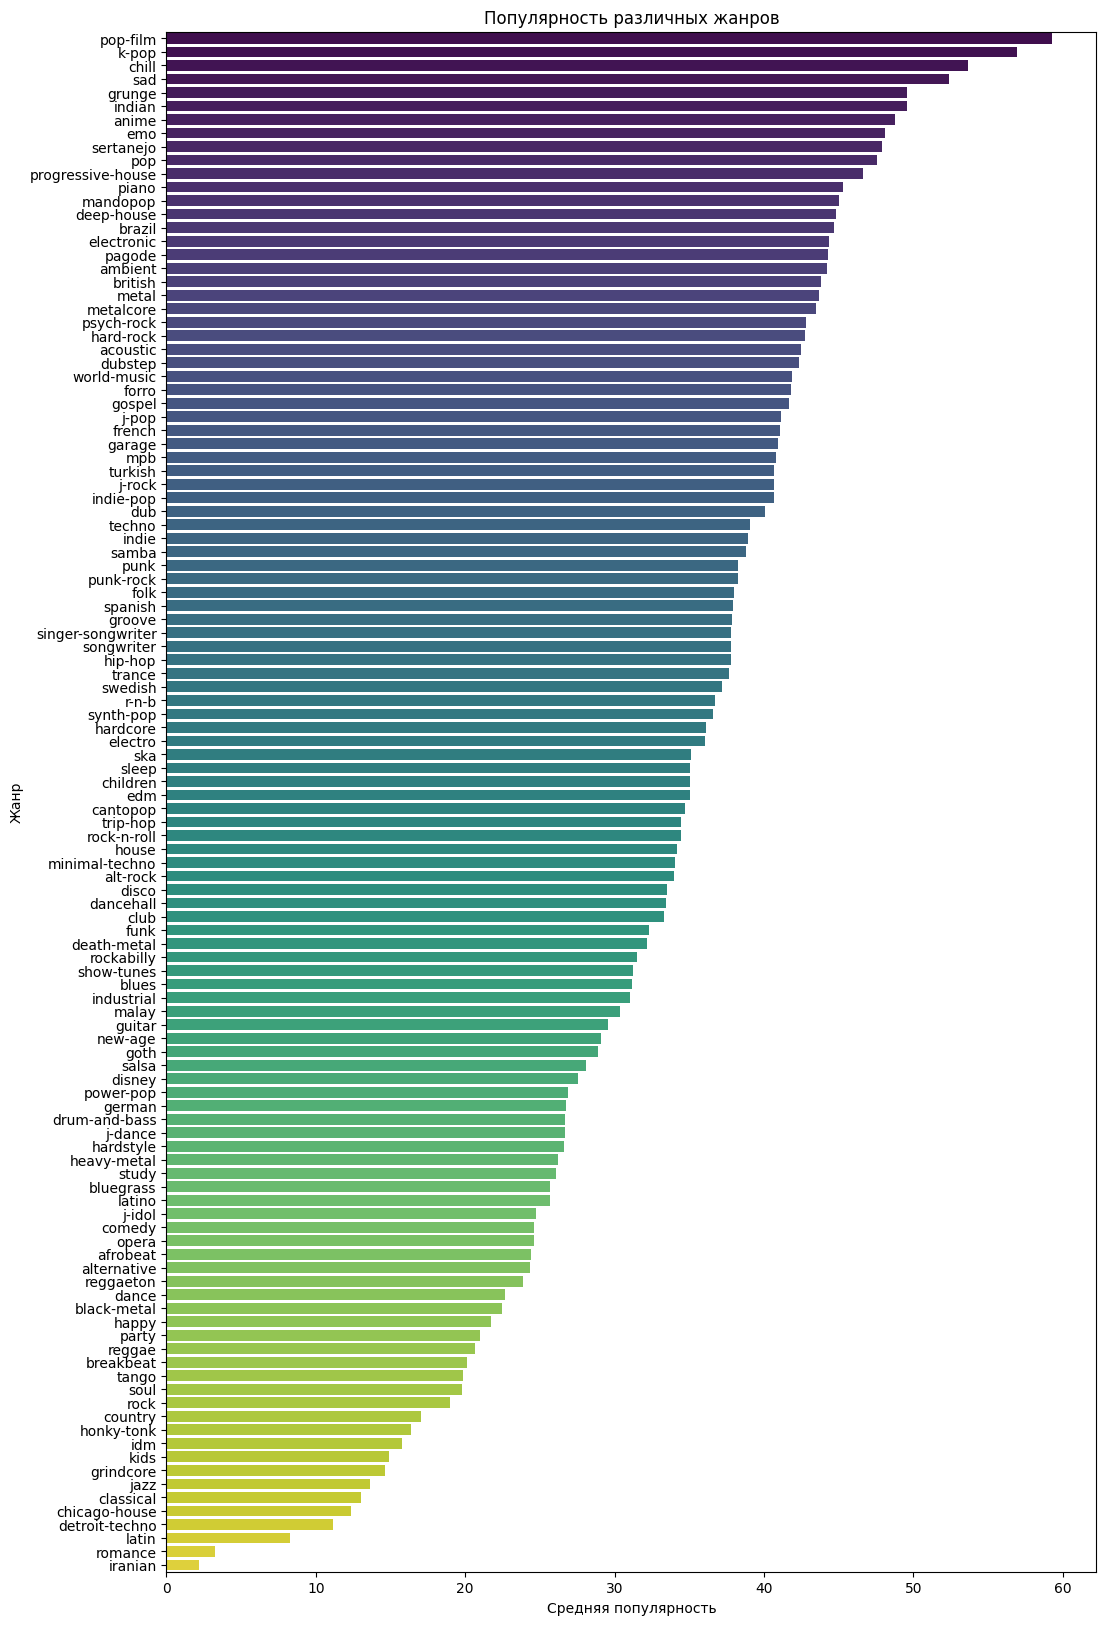

In [80]:
genre_popularity = df.groupby('track_genre')['popularity'].mean().reset_index()

# Сортируем по популярности
genre_popularity = genre_popularity.sort_values(by='popularity', ascending=False)

# Визуализируем
plt.figure(figsize=(12, 20))
sns.barplot(data=genre_popularity, x='popularity', y='track_genre', palette='viridis')
plt.title('Популярность различных жанров')
plt.xlabel('Средняя популярность')
plt.ylabel('Жанр')
plt.show()

Изначально я планировал объединить жанры в группы, чтобы уменьшить объем данных для обработки нейросетью. Однако позже решил оставить их без изменений, так как объединение могло бы исказить результаты: отдельные жанры могли бы существенно повлиять на показатели группы, повышая или понижая их, что могло бы негативно сказаться на анализе их влияния на популярность.

##  Кореляция начального датасета

In [81]:
categorical_cols = start_df.select_dtypes(include=['object', 'category']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    start_df[col] = le.fit_transform(start_df[col])  # Преобразуем в числовой формат
    label_encoders[col] = le

In [82]:
start_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           114000 non-null  int64  
 1   album_name        114000 non-null  int64  
 2   track_name        114000 non-null  int64  
 3   popularity        114000 non-null  int64  
 4   duration_ms       114000 non-null  int64  
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  liveness          114000 non-null  float64
 15  valence           114000 non-null  float64
 16  tempo             11

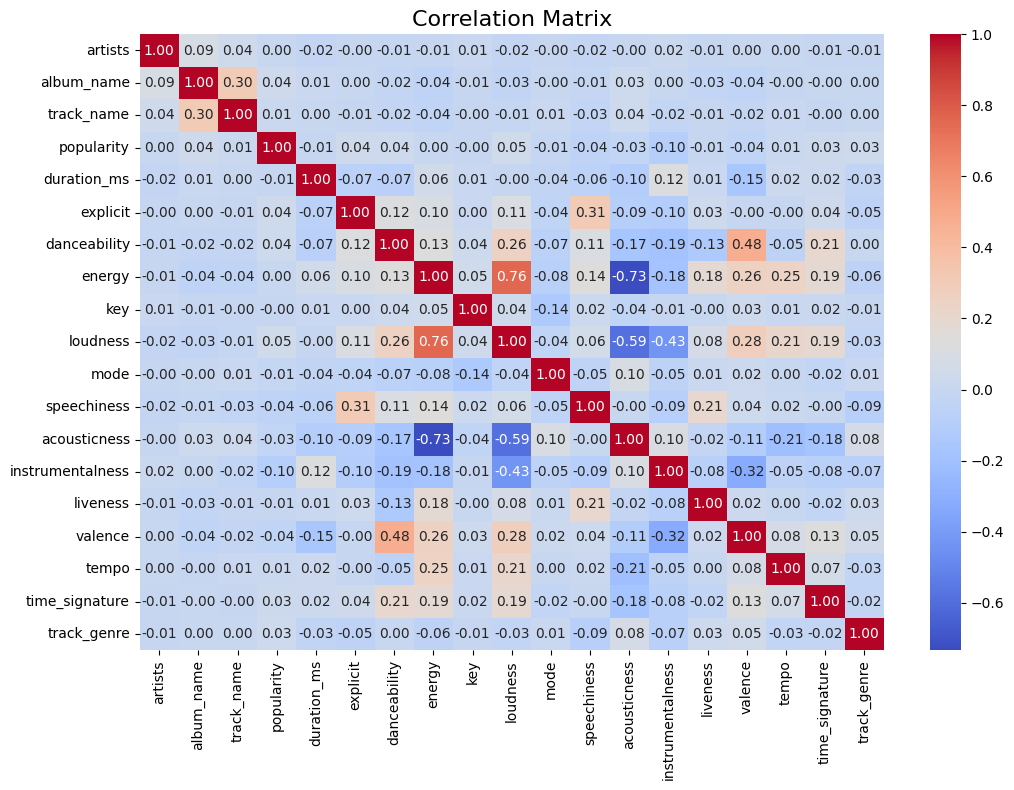

In [83]:
correlation_matrix = start_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

> Наиболее всего с популярностью коррелируют -
> 1. название альбома, наличие нецензурной лексики, танцевальность, громкость (loudness), жанр, размер (прямая зависимость).
> 2. инструментальность, акустичность, темп (обратная зависимость).

> Все остальное практически не коррелирует или коррелирует слишком слабо, чтобы это отобразирось, и такие поля будут потенциально отброшены в будущем. Но прежде чем сделать это необходимо будет
> попытаться извель из них полезную информацию, которая будет влиять на популярность с помощью future engineering

# 👨‍💻Feature Engineering.


## Feature Engineering.

В ходе анализа мною уже было добавлено несколько новых полей для датафрейма

In [84]:

df['num_artists'] = df['artists'].str.split(';').apply(lambda x: len(x) if isinstance(x, list) else 0)

df['is_fit_album'] = df['album_name'].str.contains(
    r'\(.*?(' + '|'.join(keywords) + r').*?\)',
    case=False, na=False
)

df['is_fit_track'] = df['track_name'].str.contains(
    r'\(.*?(' + '|'.join(keywords) + r').*?\)',
    case=False,
    na=False
)

df['duration_min'] = df['duration_ms'] / 60000

df['duration_category'] = pd.cut(df['duration_min'], bins=bins, labels=labels, right=False)

df

<ipython-input-84-bc3114b963b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_artists'] = df['artists'].str.split(';').apply(lambda x: len(x) if isinstance(x, list) else 0)
<ipython-input-84-bc3114b963b3>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['is_fit_album'] = df['album_name'].str.contains(
<ipython-input-84-bc3114b963b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_fit_album'] = df['

artists  \
0                  Gen Hoshino   
1                 Ben Woodward   
2       Ingrid Michaelson;ZAYN   
3                 Kina Grannis   
4             Chord Overstreet   
...                        ...   
113995           Rainy Lullaby   
113996           Rainy Lullaby   
113997           Cesária Evora   
113998        Michael W. Smith   
113999           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  key  loudness  ...  duration_category  \
0              0.676  0.4610    1    -6.746  ...            2-4 мин   
1              0.420  0.1660    1   -17.235  ...            2-4 мин   
2              0.438  0.3590    0    -9.734  ...            2-4 мин   
3              0.266  0.0596    0   -18.515  ...            2-4 мин   
4              0.618  0.4430    2    -9.681  ...            2-4 мин   
...              ...     ...  ...       ...  ...                ...   
113995         0.172  0.2350    5   -16.393  ...            6-8 мин   
113996         0.174  0.1170    0   -18.318  ...            6-8 мин   
113997         0.629  0.3290    0   -10.895  ...            4-6 мин   
113998         0.587  0.5060    7   -10.889  ...            4-6 мин   
113999         0.526  0.4870    1   -10.204  ...            4-6 мин   

        danceability_category  energy_category  loudness_category  \
0                           7                2                  5   
1                           1                0                  0   
2                           2                1                  2   
3                           0                0                  0   
4                           5                2                  2   
...                       ...              ...                ...   
113995                      0                0                  0   
113996                      0                0                  0   
113997                      6                1                  2   
113998                      5                2                  2   
113999                      3                2                  2   

        speechiness_category  acousticness_category  \
0                          8                      3   
1                          7                      9   
2                          5                      5   
3                          2                      9   
4                          5                   

* **'num_artists'** - количество исполнителей
* **'is_fit_album'** - является ли альбом фитом
* **'is_fit_track'** - является ли трек фитом
* **'duration_min'** - длительность в минутах
* **'duration_category'** = временная категория
* **'danceability_category'**-------|
* **'energy_category'**-------------|
* **'loudness_category'**-----------|
* **'speechiness_category'**--------|
* **'acousticness_category'**------- = = = = = >    Аудиофичи поделенные на 10 категорий для лучшей обработки нейросетью
* **'instrumentalness_category'**---|
* **'liveness_category'**-----------|
* **'valence_category'**------------|
* **'tempo_category'**--------------|ry'

Попробуем добавить еще несколько доп признаков.

In [85]:
top_artists = artist_popularity.index.tolist()

df['is_top_artist'] = df['artists'].apply(
    lambda artists: any(artist.strip() in top_artists for artist in artists.split(';'))
)


top_albums = (
    df.groupby('album_name')['popularity']
    .mean()
    .sort_values(ascending=False)
    .head(60)
    .index.tolist()
)

df['is_top_album'] = df['album_name'].isin(top_albums)

df

<ipython-input-85-f1a773432b17>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_top_artist'] = df['artists'].apply(
<ipython-input-85-f1a773432b17>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_top_album'] = df['album_name'].isin(top_albums)


artists  \
0                  Gen Hoshino   
1                 Ben Woodward   
2       Ingrid Michaelson;ZAYN   
3                 Kina Grannis   
4             Chord Overstreet   
...                        ...   
113995           Rainy Lullaby   
113996           Rainy Lullaby   
113997           Cesária Evora   
113998        Michael W. Smith   
113999           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  key  loudness  ...  energy_category  \
0              0.676  0.4610    1    -6.746  ...                2   
1              0.420  0.1660    1   -17.235  ...                0   
2              0.438  0.3590    0    -9.734  ...                1   
3              0.266  0.0596    0   -18.515  ...                0   
4              0.618  0.4430    2    -9.681  ...                2   
...              ...     ...  ...       ...  ...              ...   
113995         0.172  0.2350    5   -16.393  ...                0   
113996         0.174  0.1170    0   -18.318  ...                0   
113997         0.629  0.3290    0   -10.895  ...                1   
113998         0.587  0.5060    7   -10.889  ...                2   
113999         0.526  0.4870    1   -10.204  ...                2   

        loudness_category  speechiness_category  acousticness_category  \
0                       5                     8                      3   
1                       0                     7                      9   
2                       2                     5                      5   
3                       0                     2                      9   
4                       2                     5                      6   
...                   ...                   ...                    ...   
113995                  0                     3                      7   
113996                  0                     3                      9   
113997                  2                     3                      8   
113998                  2                     0                      6   
113999                  2                     6                      7   

        instrumentalness_category  liveness_category  valence_category  \
0                               0                  8                 7   
1                               1                  2                 2   
2                               0                  4            

* 'is_top_album' - находится ли песня в топовом альбоме или нет.
* 'is_top_artist' - есть ли среди исполнителей топовый.

Кодируем все наши данные, чтобы вывести их корреляцию

In [86]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

<ipython-input-86-a362328e059d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-86-a362328e059d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-86-a362328e059d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

## Корреляция новых колонок с таргетом

Выводим корреляцию наших старых данных и новых.

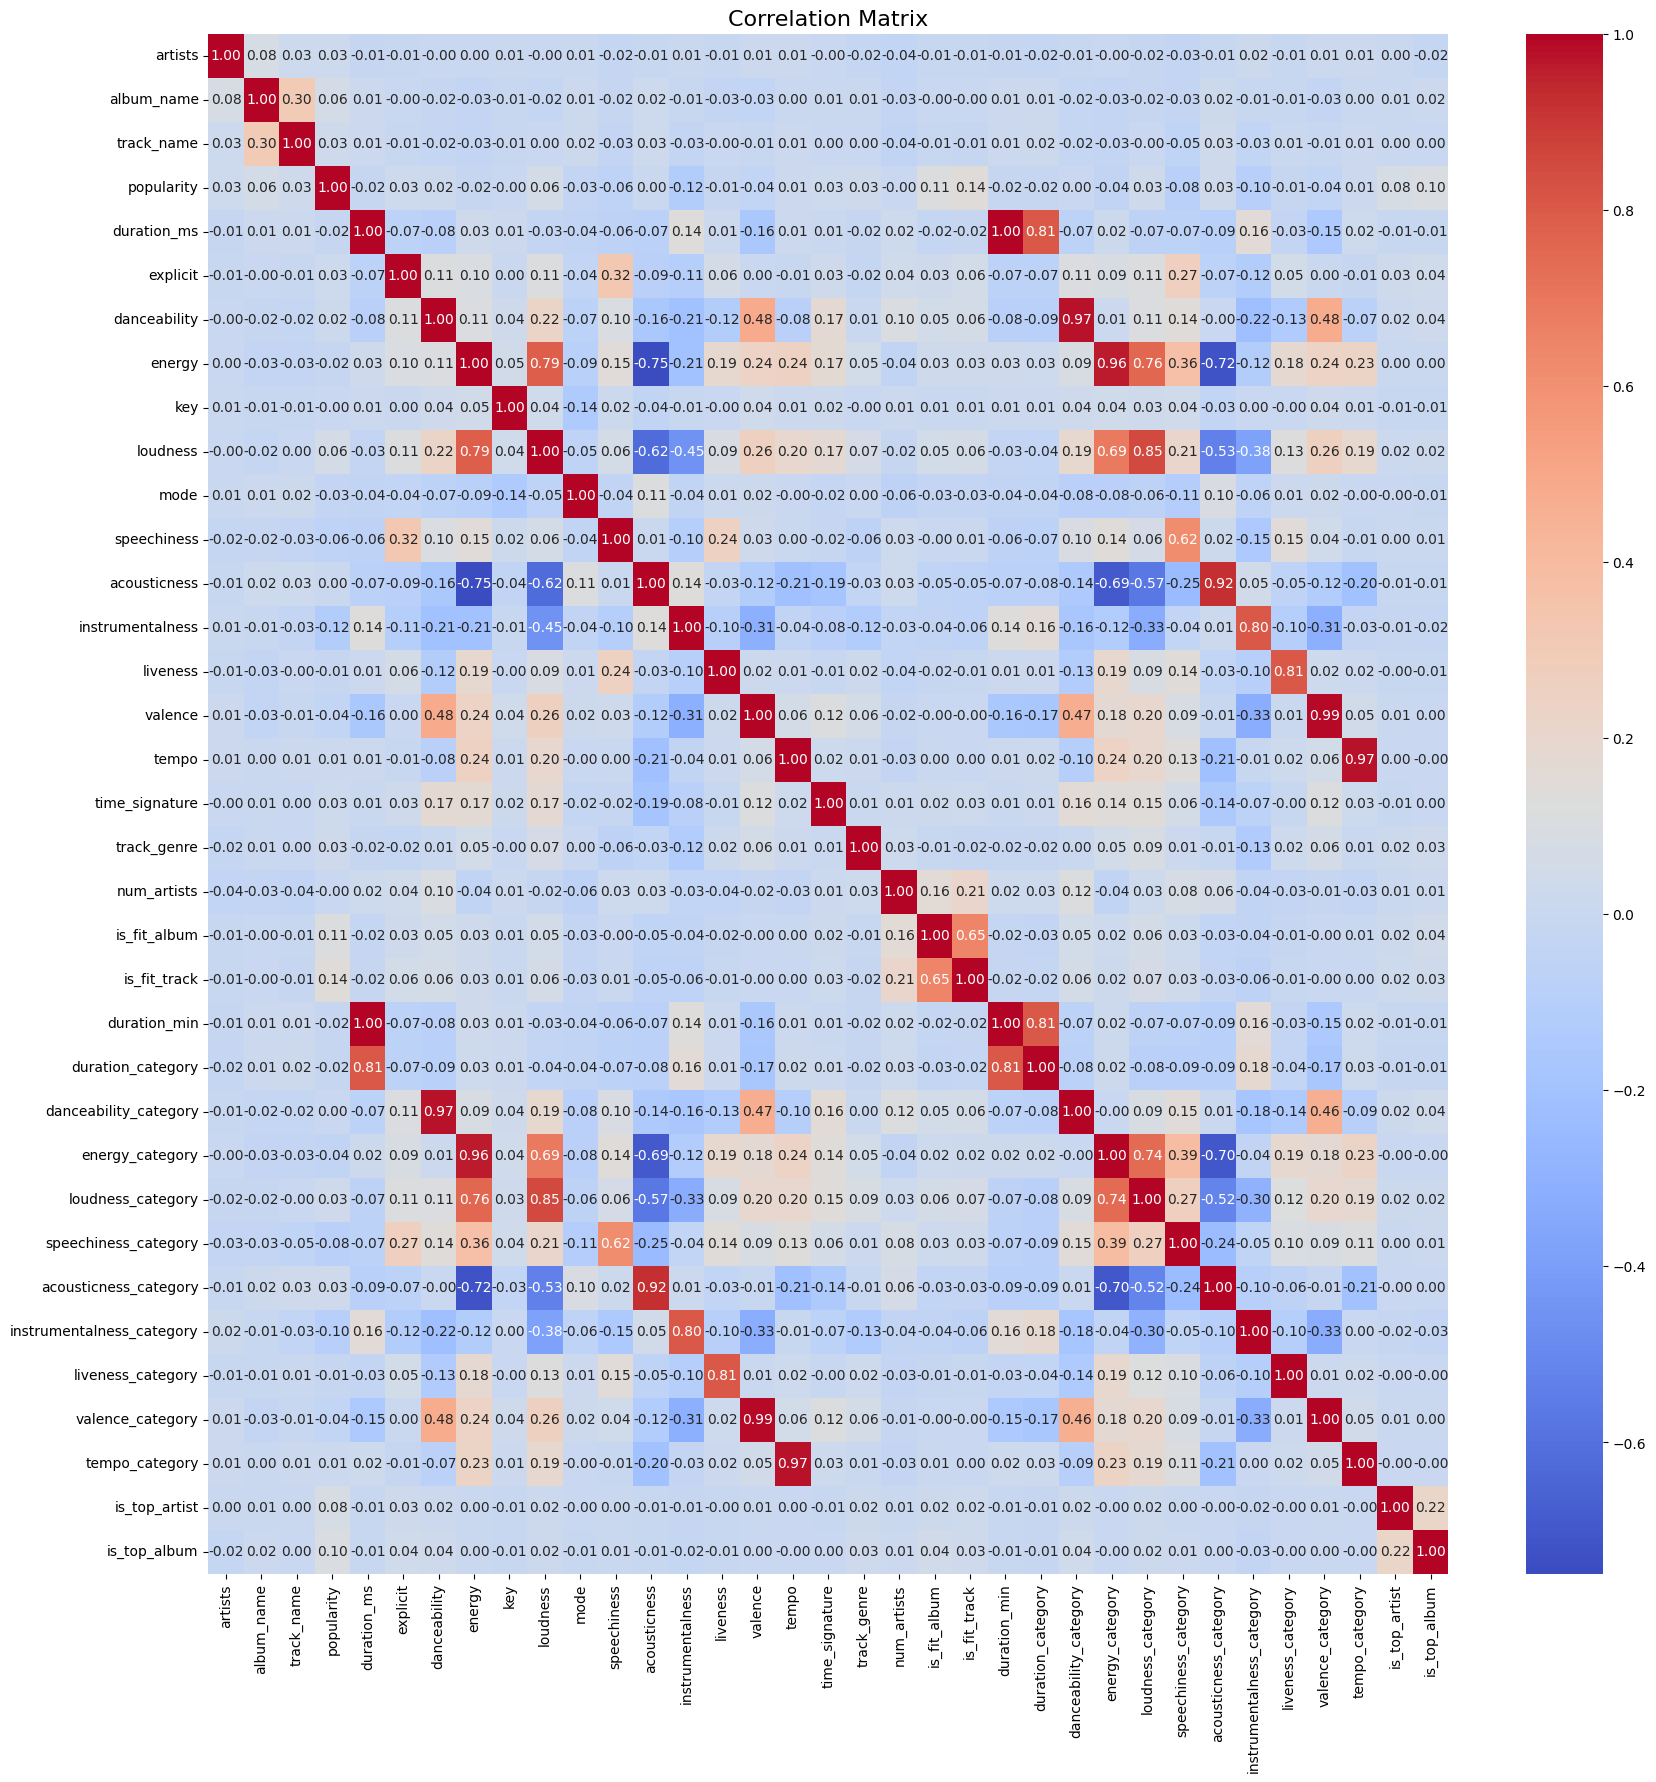

In [46]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

> На таблице корреляций сразу видим, то что созданные нами признаки связанные со временем сильно коррелируют, это и понятно, потому что они созданы исходя из 1 столбца - длительности в мс. Мое решение это обросить длительность в мс и длительность в минутах и оставить только категории времени. Это облегчит работу нейросети.

> Помимо этого колонка energy сильно коррелирует с двумя другими, при этом оказываю минимальное влияние на популярность поэтому я тоже ее отброшу. Как и все аудио фичи - так как у них есть полная замена.

> Что касается имени артиста и тональности хоть они и показывают 0 кореляцию, пока удалять их мы не будем, сначала попробуем использовать их а затем и без них, и выберем лучший результат

In [33]:
columns = ['duration_ms','duration_min', 'energy','danceability','loudness','speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo']
df = df.drop(columns=columns, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   artists                    113999 non-null  int64
 1   album_name                 113999 non-null  int64
 2   track_name                 113999 non-null  int64
 3   popularity                 113999 non-null  int64
 4   explicit                   113999 non-null  bool 
 5   key                        113999 non-null  int64
 6   mode                       113999 non-null  int64
 7   time_signature             113999 non-null  int64
 8   track_genre                113999 non-null  int64
 9   num_artists                113999 non-null  int64
 10  is_fit_album               113999 non-null  bool 
 11  is_fit_track               113999 non-null  bool 
 12  duration_category          113999 non-null  int64
 13  danceability_category      113999 non-null  int64
 14  energy_ca

In [48]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

По всем оставшимся значениям, не могу сделать точного вывода, что стоит оставить а что нет, придется эксперементировать при создании самой модели.
Сначала пробовал, оставляя все имена, но затем удалив их, результат только улучшился, поэтому решил продолжать без них. Пробовал на страндартном датасете, опасаясь что сделал неправильные доп признаки, результат стал хуже

## Простая модель.

Проба на стандартном df

In [68]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X = start_df.drop(columns=['popularity'])
y = start_df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

# Создание модели
model = keras.Sequential([
    keras.layers.Input(shape=(x_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
loss = model.evaluate(x_test,y_test)
print(f'Test loss: {loss}')

Epoch 1/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 696.3589 - val_loss: 480.5049
Epoch 2/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 479.7208 - val_loss: 474.8442
Epoch 3/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 476.7727 - val_loss: 468.6179
Epoch 4/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 466.2912 - val_loss: 459.1164
Epoch 5/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 455.3858 - val_loss: 458.5188
Epoch 6/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 450.4446 - val_loss: 450.4778
Epoch 7/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 439.9897 - val_loss: 445.3691
Epoch 8/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 436.2346 - val_loss: 445.3363
Epoch 9/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 430.5814 - val_loss: 441.4930
Epoch 10/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 432.3736 - val_loss: 439.0207
Epoch 11/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 430.9895 - val_l

Выдало огромный loss, предположения, что модель слишком простая для такого объема данных, и их необходимо либо уменишить, либо улучшить модель.

In [72]:
X = df.drop(columns=['popularity'])
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Input(shape=(x_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

y_pred = model.predict(x_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
loss = model.evaluate(x_test, y_test)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")
print(f'Test loss: {loss}')


Epoch 1/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 706.6575 - val_loss: 465.8442
Epoch 2/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 460.9087 - val_loss: 461.0041
Epoch 3/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 453.2055 - val_loss: 453.8957
Epoch 4/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 446.5905 - val_loss: 446.6245
Epoch 5/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 436.9045 - val_loss: 441.2277
Epoch 6/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 434.0974 - val_loss: 435.6535
Epoch 7/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 430.0131 - val_loss: 432.4376
Epoch 8/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 420.9282 - val_loss: 429.6555
Epoch 9/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 418.2079 - val_loss: 428.8336
Epoch 10/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 417.6860 - val_loss: 425.3462
Epoch 11/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 413.9151 - val_l

Здесь та же самая ситуация, что и со стандартным df, но результат немного получе, не уверен что это связано с доп признаками, но в среднем она работает лучше, поэтому необходимо улучшить модель и уже затем посмотреть на результат, и уже изменять df дальше. Лучший результат был 405 loss.

In [76]:
!pip install scikeras
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107721 sha256=acd31ce726c213ec2e835ceb6c0df196fb22c611defa85541f664e9c130bc162
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [83]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

X_test = X_test.astype('float32')
X_train = X_train.astype('float32')
y_pred = model.predict(X_test).flatten()

perm_importance = permutation_importance(
    model, X_test, y_test, scoring='r2', n_repeats=10, random_state=42
)

for i, feature in enumerate(X.columns):
    print(f"{feature}: {perm_importance.importances_mean[i]:.4f}")

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")
plt.show()


713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━

Тут превосходят значения album_name и track_name. Из-за чего график стал совсем,не ясным, но по данным выше можно сказать, что основными данными для нейросети стали именно album_name и track_name. А отрицательное влияние оказали в основном artists. Попробуем в будущем что то сделать с этими данными и посмотрим на результат.

Попробуем с линейной моделью

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_pred = linear_model.predict(X_test)
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_rmse = mean_squared_error(y_test, linear_pred) ** 0.5

print(f"Linear Regression MAE: {linear_mae}")
print(f"Linear Regression RMSE: {linear_rmse}")

Linear Regression MAE: 18.16514708209456
Linear Regression RMSE: 21.741174838469583


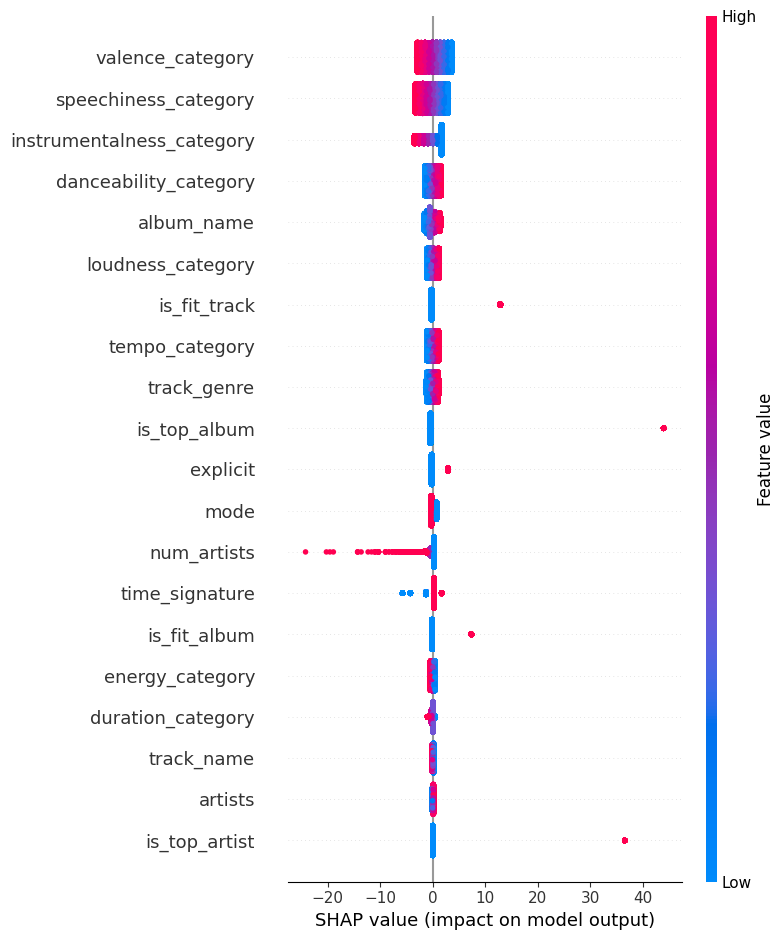

In [85]:
import shap
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes('bool').columns})
explainer = shap.Explainer(linear_model, X_train)

shap_values = explainer(X_train)

shap.summary_plot(shap_values, X_train)

Попробуем удалить колонку с артистами

In [34]:
columns = ['artists']
df = df.drop(columns=columns, errors='ignore')

In [89]:
X = df.drop(columns=['popularity'])
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Input(shape=(x_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

y_pred = model.predict(x_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
loss = model.evaluate(x_test, y_test)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")
print(f'Test loss: {loss}')

Epoch 1/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 684.3389 - val_loss: 466.7057
Epoch 2/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 463.3731 - val_loss: 458.5183
Epoch 3/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 453.5947 - val_loss: 453.2397
Epoch 4/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 450.3582 - val_loss: 449.3763
Epoch 5/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 442.5276 - val_loss: 443.7411
Epoch 6/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 433.6944 - val_loss: 438.9063
Epoch 7/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 432.5396 - val_loss: 436.9301
Epoch 8/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 425.3748 - val_loss: 431.7280
Epoch 9/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 417.5399 - val_loss: 426.2204
Epoch 10/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 416.0740 - val_loss: 422.1327
Epoch 11/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 410.6225 - val_l

In [90]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

X_test = X_test.astype('float32')
X_train = X_train.astype('float32')

y_pred = model.predict(X_test).flatten()

perm_importance = permutation_importance(
    model, X_test, y_test, scoring='r2', n_repeats=10, random_state=42
)

for i, feature in enumerate(X.columns):
    print(f"{feature}: {perm_importance.importances_mean[i]:.4f}")

excluded_features = ['album_name', 'track_name']
filtered_indices = [i for i, feature in enumerate(X.columns) if feature not in excluded_features]

sorted_idx = perm_importance.importances_mean[filtered_indices].argsort()
filtered_features = [X.columns[i] for i in filtered_indices]

plt.barh(
    [filtered_features[i] for i in sorted_idx],
    perm_importance.importances_mean[filtered_indices][sorted_idx]
)
plt.xlabel("Permutation Importance")
plt.title("Feature Importance (Excluding 'album_name' and 'track_name')")
plt.show()


713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━

Удалил признак, который явно тянул нейронную сеть вниз, с остальными признаками остались сомнения. Все еще придерживаюсь мнения слишком простая нейросеть, чтобы обработать все данные. Решил оставить все как есть и перейти к экспериментам с моделями.

# 👩‍🎓Эксперименты с моделями машинного обучения/глубокого обучения.

## Линейные

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

X = df.drop(columns=['popularity'])
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
loss = np.mean((y_pred - y_test) ** 2)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")
print(f'Test loss (MSE): {loss}')

MAE: 18.16610033763679
RMSE: 21.74183796486538
R^2: 0.047132536872437014
Test loss (MSE): 472.70751809046146


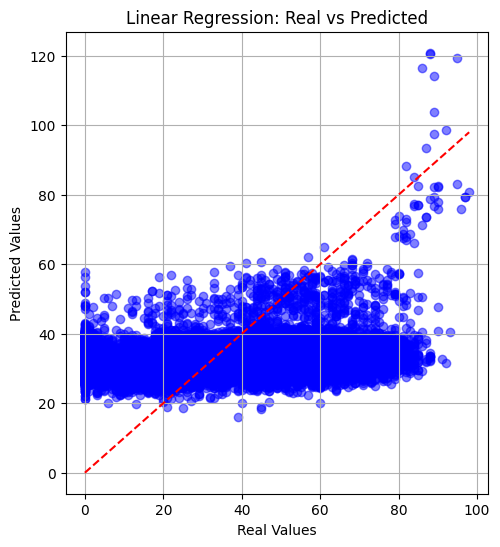

In [101]:
y_pred_simple = model.predict(x_test)

mae_simple = mean_absolute_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mean_squared_error(y_test, y_pred_simple))
r2_simple = r2_score(y_test, y_pred_simple)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_simple, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Linear Regression: Real vs Predicted')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.grid(True)

In [102]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV


poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

ridge_model = Ridge()

param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']

model = Ridge(alpha=best_alpha)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
loss = np.mean((y_pred - y_test) ** 2)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")
print(f'Test loss (MSE): {loss}')



MAE: 17.2924185680703
RMSE: 21.073243761838217
R^2: 0.10483566700160052
Test loss (MSE): 444.08160264585337


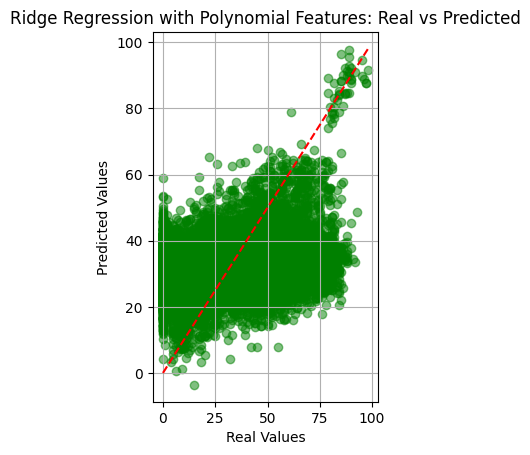

In [103]:
y_pred_ridge = model.predict(X_test_scaled)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Ridge Regression with Polynomial Features: Real vs Predicted')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.grid(True)

## Деревья

In [35]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split

X = df.drop(columns=['popularity'])
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_dt, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Решающее дерево: Реальные vs Предсказанные')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Случайный лес: Реальные vs Предсказанные')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Решающее дерево - MAE: {mae_dt}, RMSE: {rmse_dt}, R^2: {r2_dt}")
print(f"Случайный лес - MAE: {mae_rf}, RMSE: {rmse_rf}, R^2: {r2_rf}")


Решающее дерево - MAE: 14.219714912280702, RMSE: 21.9856539648735, R^2: 0.025641530224678077
Случайный лес - MAE: 11.757219799498746, RMSE: 15.796109231566689, R^2: 0.4970321278955967


Результаты обоих деревьев намного лучше, чем у линейной модели, но среди деревьев силнее отличилось именно случайный лес, который показал отличные результаты.

## Градиент бустинг

Здесь, я пробовал сделать с удаленными значениями, и вообще не трогав датасет, оставив со всеми значениями. 2 вариант показал себя намного лучше.
50 против 70 r2

In [92]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.1,
    'max_depth': 16,
    'subsample': 0.95,
    'colsample_bytree': 0.45,
    'seed': 74
}

num_rounds = 120
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=num_rounds,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=10,
    verbose_eval=12
)

y_pred = model.predict(dtest)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

[0]	train-rmse:21.61352	test-rmse:21.75652
[12]	train-rmse:14.27488	test-rmse:16.80099
[24]	train-rmse:10.61547	test-rmse:14.74694
[36]	train-rmse:8.64300	test-rmse:13.83795
[48]	train-rmse:7.10128	test-rmse:13.25998
[60]	train-rmse:6.03215	test-rmse:12.91313
[72]	train-rmse:5.02179	test-rmse:12.64318
[84]	train-rmse:4.19002	test-rmse:12.44133
[96]	train-rmse:3.43739	test-rmse:12.27065
[108]	train-rmse:3.01856	test-rmse:12.19877
[119]	train-rmse:2.71609	test-rmse:12.11948
MAE: 8.579743229803025
RMSE: 12.119484079840577
R^2: 0.7039206027984619


In [99]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.1,
    'max_depth': 16,
    'subsample': 0.95,
    'colsample_bytree': 0.45,
    'seed': 74
}

num_rounds = 500
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=num_rounds,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=10,
    verbose_eval=12
)

y_pred = model.predict(dtest)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

[0]	train-rmse:21.61352	test-rmse:21.75652
[12]	train-rmse:14.27488	test-rmse:16.80099
[24]	train-rmse:10.61547	test-rmse:14.74694
[36]	train-rmse:8.64300	test-rmse:13.83795
[48]	train-rmse:7.10128	test-rmse:13.25998
[60]	train-rmse:6.03215	test-rmse:12.91313
[72]	train-rmse:5.02179	test-rmse:12.64318
[84]	train-rmse:4.19002	test-rmse:12.44133
[96]	train-rmse:3.43739	test-rmse:12.27065
[108]	train-rmse:3.01856	test-rmse:12.19877
[120]	train-rmse:2.64241	test-rmse:12.10702
[132]	train-rmse:2.32574	test-rmse:12.04822
[144]	train-rmse:2.07867	test-rmse:12.00666
[156]	train-rmse:1.88525	test-rmse:11.95498
[168]	train-rmse:1.72911	test-rmse:11.92205
[180]	train-rmse:1.57538	test-rmse:11.88519
[192]	train-rmse:1.46486	test-rmse:11.86913
[204]	train-rmse:1.39077	test-rmse:11.85449
[216]	train-rmse:1.30880	test-rmse:11.83669
[228]	train-rmse:1.24306	test-rmse:11.82106
[240]	train-rmse:1.16650	test-rmse:11.80331
[252]	train-rmse:1.11750	test-rmse:11.79423
[264]	train-rmse:1.08221	test-rmse:11.7

Максимальный результат, который я выжал из этой модели, если бы я еще увеличивал num_rounds = 500. Думаю результат можно было улучшить, но время выполнения уже очень сильно увеличивется

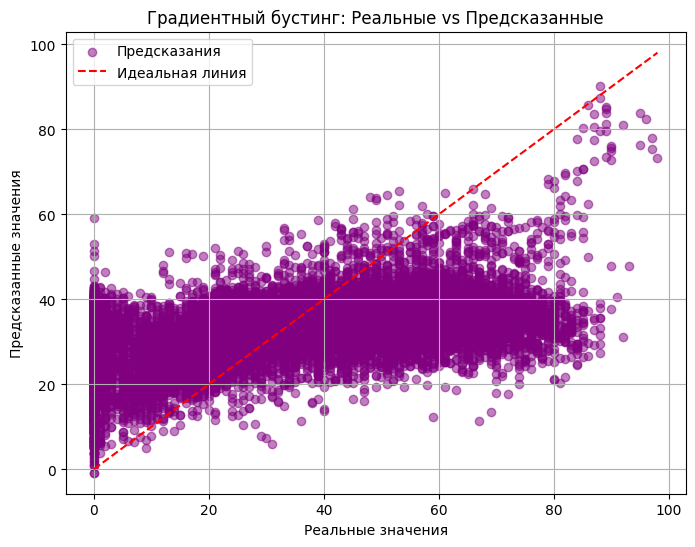

In [101]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, color='purple', alpha=0.5, label='Предсказания')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Идеальная линия')
plt.title('Градиентный бустинг: Реальные vs Предсказанные')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.grid(True)
plt.show()

Результаты получились довольно слабые попробуем catboster

In [48]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


In [91]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import shap

X = df.drop(columns=['popularity'])
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

catboost_model = CatBoostRegressor(verbose=0, random_state=42, cat_features=['explicit','artists'])
catboost_model.fit(X_train, y_train)

catboost_pred = catboost_model.predict(X_test)
catboost_mae = mean_absolute_error(y_test, catboost_pred)
catboost_rmse = mean_squared_error(y_test, catboost_pred) ** 0.5
catboost_r2 = r2_score(y_test, catboost_pred)

print(f"CatBoost MAE: {catboost_mae}")
print(f"CatBoost RMSE: {catboost_rmse}")
print(f"CatBoost R^2: {catboost_r2}")

results_df = pd.DataFrame({
    'Predicted': catboost_pred,
    'Actual': y_test.values
})
print(results_df.head())

CatBoost MAE: 9.125117453264236
CatBoost RMSE: 12.799173505827756
CatBoost R^2: 0.6697796442258585
   Predicted  Actual
0  45.948973      50
1  14.721776      11
2   0.376131       0
3  50.507805      34
4  21.225149      57


Результат тоже достойный, но хуже чем в прошлой модели

## Нейронные сети


Используем для начала ту самую модель которую использовали в начале.

In [103]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X = df.drop(columns=['popularity'])
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Input(shape=(x_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

y_pred = model.predict(x_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
loss = model.evaluate(x_test, y_test)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")
print(f'Test loss: {loss}')

Epoch 1/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 673.7056 - val_loss: 458.2236
Epoch 2/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 450.5826 - val_loss: 447.6969
Epoch 3/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 442.2295 - val_loss: 439.4232
Epoch 4/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 426.2391 - val_loss: 434.0382
Epoch 5/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 421.4576 - val_loss: 428.6241
Epoch 6/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 420.8121 - val_loss: 427.0131
Epoch 7/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 413.9745 - val_loss: 427.7305
Epoch 8/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 411.8427 - val_loss: 422.9732
Epoch 9/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 407.4287 - val_loss: 422.5611
Epoch 10/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 403.0410 - val_loss: 419.4839
Epoch 11/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 399.3529 - val_l

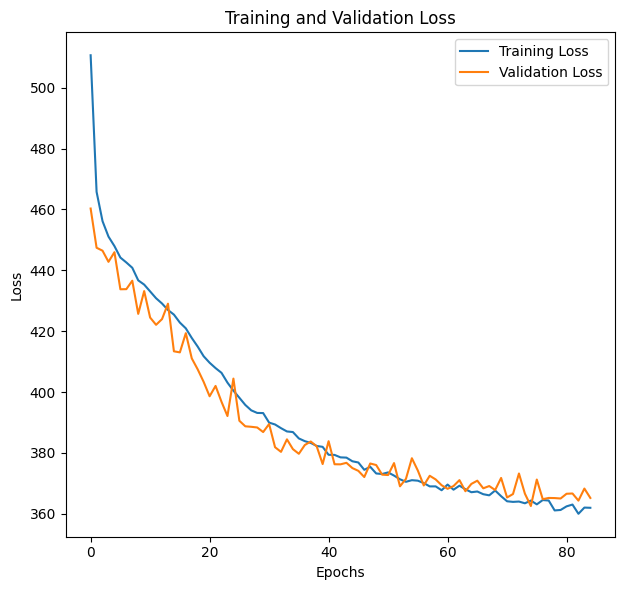

In [108]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

График получился кривой, в котором валидационные данные выходят за тренировочные, что значит что модель страдает от переобучения

In [110]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

X = df.drop(columns=['popularity'])
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Input(shape=(x_train.shape[1],)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=200, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

y_pred = model.predict(x_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
loss = model.evaluate(x_test, y_test)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")
print(f'Test loss: {loss}')


Epoch 1/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 595.5533 - val_loss: 465.3400
Epoch 2/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 465.8451 - val_loss: 446.9699
Epoch 3/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 459.9882 - val_loss: 439.2736
Epoch 4/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 450.1141 - val_loss: 439.4219
Epoch 5/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 446.7217 - val_loss: 435.4948
Epoch 6/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 443.7032 - val_loss: 430.7545
Epoch 7/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 437.9225 - val_loss: 424.8569
Epoch 8/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 434.8410 - val_loss: 427.1313
Epoch 9/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 435.3676 - val_loss: 425.6030
Epoch 10/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 433.2012 - val_loss: 421.1233
Epoch 11/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 427.8

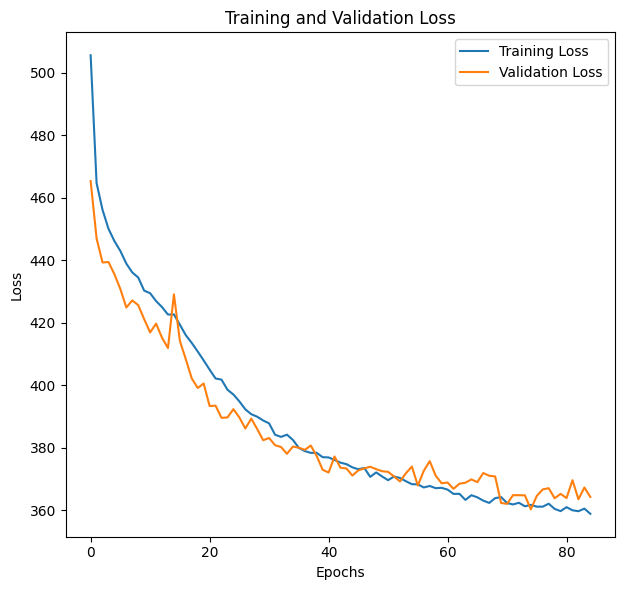

In [111]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Добавив регуляризацию и раннюю остановку, а также эпохи. График стал немного ровнее, но проблемы с переобучением не были решены, но результат был немного улучшен

## Кросс-валидация


Среди всех моделей лучшей оказалась градиент бустинг с результатом:


1.   MAE: 8.10598806953273
2.   RMSE: 11.738075717717683
3.   R^2: 0.722262978553772

Остальные модели:
Линейная


1.   MAE: 17.2924185680703
2.   RMSE: 21.073243761838217
3.   R^2: 0.10483566700160052
4.   Test loss (MSE): 444.08160264585337

Деревья - randomForest


1.    MAE: 11.757219799498746
2.    RMSE: 15.796109231566689
3.    R^2: 0.4970321278955967

Нейронные сети

1.    MAE: 14.633555339114707
2.    RMSE: 18.618171427700265
3.    R^2: 0.3012624979019165
4.    Test loss: 355.5244140625

Я уверен, что если еще немного помудрить с датасетом, можно добиться лучших результатов, но это все чего я смог добиться на данный момент с разными нейросетями.











Перейдем к кросс валидации


In [118]:
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []
mse_scores = []
mae_scores = []
r2_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        eta=0.1,
        max_depth=16,
        subsample=0.95,
        colsample_bytree=0.45,
        seed=74
    )

    model.fit(X_train_fold, y_train_fold)

    y_pred_fold = model.predict(X_val_fold)

    rmse_fold = np.sqrt(mean_squared_error(y_val_fold, y_pred_fold))
    mse_fold = mean_squared_error(y_val_fold, y_pred_fold)
    mae_fold = mean_absolute_error(y_val_fold, y_pred_fold)
    r2_fold = r2_score(y_val_fold, y_pred_fold)

    rmse_scores.append(rmse_fold)
    mse_scores.append(mse_fold)
    mae_scores.append(mae_fold)
    r2_scores.append(r2_fold)

mean_rmse = np.mean(rmse_scores)
mean_mse = np.mean(mse_scores)
mean_mae = np.mean(mae_scores)
mean_r2 = np.mean(r2_scores)

print(f"RMSE для каждого фолда: {rmse_scores}")
print(f"Средний RMSE: {mean_rmse}")
print(f"MAE для каждого фолда: {mae_scores}")
print(f"Средний MAE: {mean_mae}")
print(f"R^2 для каждого фолда: {r2_scores}")
print(f"Средний R^2: {mean_r2}")


RMSE для каждого фолда: [12.922301966392963, 12.968610035576058, 12.848528621847619, 12.893165285918938, 12.887049981053307]
Средний RMSE: 12.903931178157777
MAE для каждого фолда: [9.283274069092805, 9.269415340182693, 9.217408237064701, 9.229877025237332, 9.229173888909957]
Средний MAE: 9.245829712097498
R^2 для каждого фолда: [0.6666937470436096, 0.6620496511459351, 0.66831374168396, 0.6654905080795288, 0.6650280952453613]
Средний R^2: 0.665515148639679


In [119]:
rmse_scores = [12.922301966392963, 12.968610035576058, 12.848528621847619, 12.893165285918938, 12.887049981053307]
mae_scores = [9.283274069092805, 9.269415340182693, 9.217408237064701, 9.229877025237332, 9.229173888909957]
r2_scores = [0.6666937470436096, 0.6620496511459351, 0.66831374168396, 0.6654905080795288, 0.6650280952453613]

mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
mean_r2 = np.mean(r2_scores)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].plot(rmse_scores, marker='o', label='RMSE по фолдам')
axs[0].axhline(mean_rmse, color='r', linestyle='--', label=f'Средний RMSE: {mean_rmse:.2f}')
axs[0].set_title('RMSE по фолдам')
axs[0].set_xlabel('Фолды')
axs[0].set_ylabel('RMSE')
axs[0].legend()

axs[1].plot(mae_scores, marker='o', label='MAE по фолдам')
axs[1].axhline(mean_mae, color='r', linestyle='--', label=f'Средний MAE: {mean_mae:.2f}')
axs[1].set_title('MAE по фолдам')
axs[1].set_xlabel('Фолды')
axs[1].set_ylabel('MAE')
axs[1].legend()

axs[2].plot(r2_scores, marker='o', label='R^2 по фолдам')
axs[2].axhline(mean_r2, color='r', linestyle='--', label=f'Средний R^2: {mean_r2:.2f}')
axs[2].set_title('R^2 по фолдам')
axs[2].set_xlabel('Фолды')
axs[2].set_ylabel('R^2')
axs[2].legend()

plt.tight_layout()
plt.show()


На кросс валидации, градиент бустинг показал себя немного хуже, но все еще имеет хорошие результаты, практически не отстающие от лучшего показателя.

# Вывод

Лучшей моделью из всех стал именно градиент бустинг

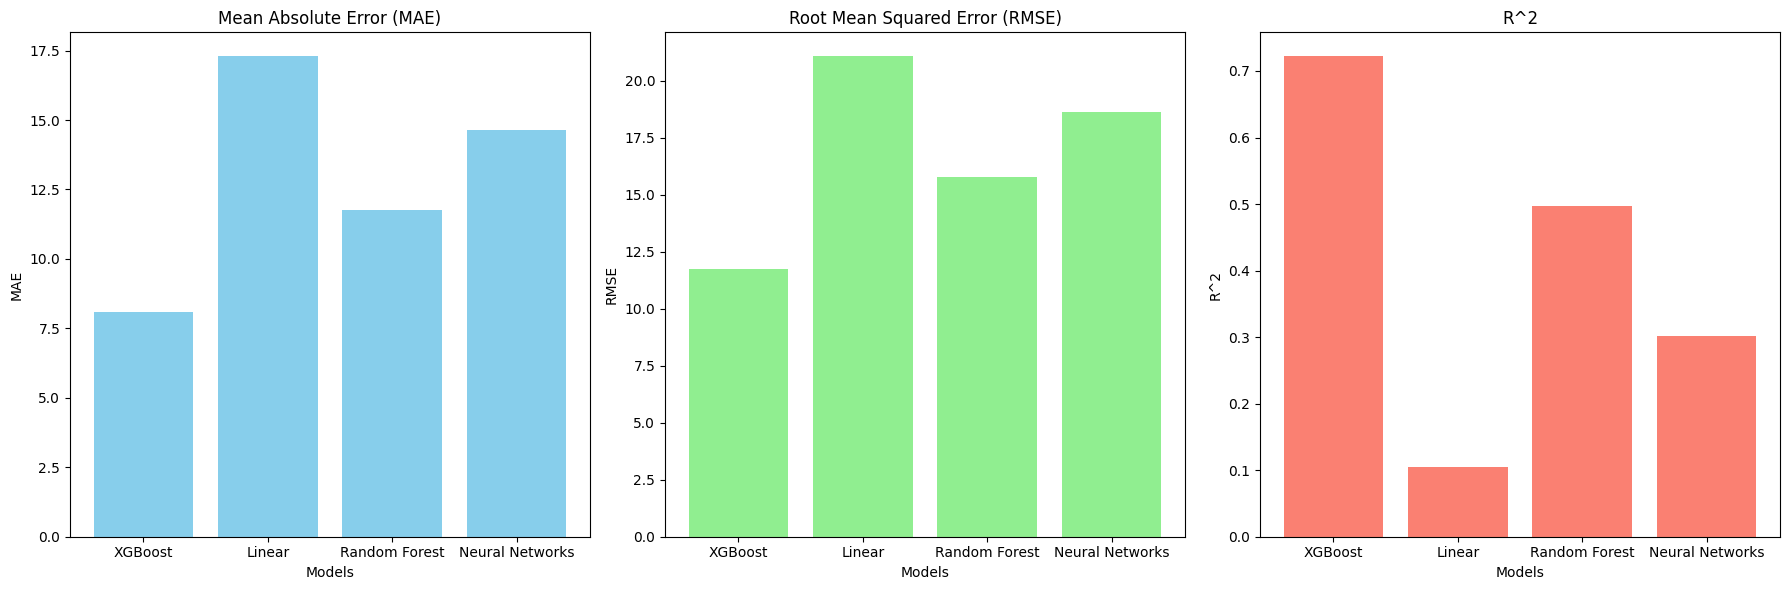

In [113]:
import matplotlib.pyplot as plt

models = ['XGBoost', 'Linear', 'Random Forest', 'Neural Networks']

mae_values = [8.106, 17.292, 11.757, 14.634]
rmse_values = [11.738, 21.073, 15.796, 18.618]
r2_values = [0.722, 0.105, 0.497, 0.301]

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.bar(models, mae_values, color='skyblue')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Models')
plt.ylabel('MAE')

plt.subplot(1, 3, 2)
plt.bar(models, rmse_values, color='lightgreen')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Models')
plt.ylabel('RMSE')

plt.subplot(1, 3, 3)
plt.bar(models, r2_values, color='salmon')
plt.title('R^2')
plt.xlabel('Models')
plt.ylabel('R^2')

plt.tight_layout()
plt.show()


Вот графики, отображающие результаты для различных моделей:

MAE (Mean Absolute Error) — показывает, насколько сильно среднее предсказание модели отличается от фактического значения.

RMSE (Root Mean Squared Error) — мера, показывающая среднее квадратичное отклонение предсказаний от реальных значений.

R^2 — коэффициент детерминации, который указывает на степень объясняемой вариативности зависимой переменной моделью.

R^2 выше всего у градиент бустинга, затем идет randomForest, нейронные сети и в конце линейная модель

По всем остальным велечинам, все с точностью наоборот, градиент бустинг имеет наименьшие отклонения,  затем идет randomForest, нейронные сети и в конце линейная модель.

Результатом работы я удовлетворен, хотелось бы получить значения получше, но получился и так достойный результат по моему мнению. Немного не хватило знаний по каждой из моделей, чтобы сделать результаты еще лучше.

Аналитика так же, была проделана объемная, но я считаю что можно было найти другие признаки, которые дали бы больший прирост к точности.